In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  0
2.9.1


# Load matches and attributes

In [2]:
#matches = pd.read_csv('fdata.csv')
matches = pd.read_csv('https://www.football-data.co.uk/mmz4281/2223/E0.csv')


matches = matches.dropna(how='any')

## Analyse loaded data

In [3]:
matches.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86


## Check for null values on each column in each array

In [4]:
pd.isnull(matches).sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64

# Create dataframes for each betting company

In [5]:
#Load a part of the data to able to do calculations faster
#matches = matches.sample(n=5000)

b365_matches = matches.dropna(subset=['B365H', 'B365D', 'B365A'],inplace=False)
b365_matches.drop(['BWH', 'BWD', 'BWA', 
          'IWH', 'IWD', 'IWA',  
          ], inplace = True, axis = 1)

b365_matches = b365_matches.dropna(inplace=False)

bw_matches = matches.dropna(subset=['BWH', 'BWD', 'BWA'],inplace=False)
bw_matches.drop(['B365H', 'B365D', 'B365A', 
          'IWH', 'IWD', 'IWA',  
          ], inplace=True, axis = 1)

bw_matches = bw_matches.dropna(inplace=False)

iw_matches = matches.dropna(subset=['IWH', 'IWD', 'IWA'],inplace=False)
iw_matches.drop(['B365H', 'B365D', 'B365A', 
          'BWH', 'BWD', 'BWA',  
          ], inplace=True, axis = 1)

iw_matches = iw_matches.dropna(inplace=False)

lb_matches = matches#.dropna(subset=['LBH', 'LBD', 'LBA'],inplace=False)
lb_matches.drop(['B365H', 'B365D', 'B365A', 
          'BWH', 'BWD', 'BWA',  
          'IWH', 'IWD', 'IWA',
          ], inplace=True, axis = 1)

lb_matches = lb_matches.dropna(inplace=False)
lb_matches

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,E0,22/04/2023,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.61,-0.50,1.99,1.94,1.98,1.94,2.14,1.96,1.98,1.89
310,E0,22/04/2023,15:00,Leicester,Wolves,2,1,H,1,1,...,1.70,-0.25,2.08,1.85,2.10,1.84,2.11,1.86,2.06,1.82
311,E0,22/04/2023,15:00,Liverpool,Nott'm Forest,3,2,H,0,0,...,2.90,-2.00,1.84,2.09,1.85,2.07,1.92,2.19,1.82,2.06
312,E0,23/04/2023,14:00,Bournemouth,West Ham,0,4,A,0,3,...,1.77,0.25,1.75,2.05,1.78,2.16,1.85,2.18,1.76,2.11


## Create list called bookeeper to store each betting company

In [6]:
bookeeper_list = [b365_matches,bw_matches,iw_matches,lb_matches]
#bookeeper_list

## Define functions to create new data from Match and Team_attributes

In [7]:
#Gets a label for a given match.
def get_match_outcome(match):
    home_goals = match['FTHG']
    away_goals = match['FTAG']
     
    outcome = pd.DataFrame()
    #outcome.loc[0,'match_api_id'] = match['match_api_id'] 

    #Detect match outcome  
    if home_goals > away_goals:
        outcome.loc[0,'outcome'] = "Home Team Win"
    if home_goals == away_goals:
        outcome.loc[0,'outcome'] = "Draw"
    if home_goals < away_goals:
        outcome.loc[0,'outcome'] = "Away Team Win"
      
    return outcome.loc[0]


#Get last x matches of a team.
def get_last_matches(matches, Date, team, x = 10):
    #Filter team matches from matches
    team_matches = matches[(matches['HomeTeam'] == team) | (matches['AwayTeam'] == team)]
                           
    #Filter x last matches from team matches
    last_matches = team_matches[team_matches.Date < Date].sort_values(by = 'Date', ascending = False).iloc[0:x,:]
    
    return last_matches
    
    
def get_goals(matches, team):
    home_goals = int(matches.FTHG[matches.HomeTeam == team].sum())
    away_goals = int(matches.FTAG[matches.AwayTeam == team].sum())

    total_goals = home_goals + away_goals
    
    return total_goals


def get_goals_conceided(matches, team):
    home_goals = int(matches.FTHG[matches.AwayTeam == team].sum())
    away_goals = int(matches.FTAG[matches.HomeTeam == team].sum())

    total_goals = home_goals + away_goals

    return total_goals


#Get number of wins of a specfic team from a set of matches.
def get_wins(matches, team):
    #Find home and away wins
    home_wins = int(matches.FTHG[(matches.HomeTeam == team) & (matches.FTHG > matches.FTAG)].count())
    away_wins = int(matches.FTAG[(matches.AwayTeam == team) & (matches.FTAG > matches.FTHG)].count())

    total_wins = home_wins + away_wins

    return total_wins 


#Create match specific features for a given match.
def get_match_features(match, matches, x = 10):
    Date = match.Date
    home_team = match.HomeTeam
    away_team = match.AwayTeam
    
    #Get last x matches of home and away team
    matches_home_team = get_last_matches(matches, Date, home_team, x = 5)
    matches_away_team = get_last_matches(matches, Date, away_team, x = 5)
    
    #Create goal variables
    home_goals = get_goals(matches_home_team, home_team)
    home_goals_conceided = get_goals_conceided(matches_home_team, home_team)
    away_goals = get_goals(matches_away_team, away_team)
    away_goals_conceided = get_goals_conceided(matches_away_team, away_team)
    
    #Define result data frame
    result = pd.DataFrame()
    
    
    result.loc[0, 'home_team_goals_difference'] = home_goals - home_goals_conceided
    result.loc[0, 'away_team_goals_difference'] = away_goals - away_goals_conceided
    result.loc[0, 'games_won_home_team'] = get_wins(matches_home_team, home_team) 
    result.loc[0, 'games_won_away_team'] = get_wins(matches_away_team, away_team)

    if 'B365H' in matches.columns:
        result.loc[0, 'B365H'] = match.B365H
        result.loc[0, 'B365D'] = match.B365D
        result.loc[0, 'B365A'] = match.B365A
    elif 'BWH' in matches.columns:
        result.loc[0, 'BWH'] = match.BWH
        result.loc[0, 'BWD'] = match.BWD
        result.loc[0, 'BWA'] = match.BWA
    elif 'IWH' in matches.columns:
        result.loc[0, 'IWH'] = match.IWH
        result.loc[0, 'IWD'] = match.IWD
        result.loc[0, 'IWA'] = match.IWA

    return result.loc[0]

#Create and combine features and labels for all matches
def get_features(matches, x = 10):
    
    #Get match features for all matches
    match_stats = matches.apply(lambda i: get_match_features(i, matches, x = 10), axis = 1)
    
    #Create dummies for league_id feature
    # dummies = pd.get_dummies(match_stats['league_id']).rename(columns = lambda x: 'League_' + str(x))
    # match_stats = pd.concat([match_stats, dummies], axis = 1)
    # match_stats.drop(['league_id'], inplace = True, axis = 1)
    
    #Create match outcomes
    outcomes = matches.apply(get_match_outcome, axis = 1)

    #Merge features, outcomes into one frame
    features = pd.concat([match_stats, outcomes], axis = 1)
    #Drop NA values
    # features.dropna(inplace = True)
    
    return features

## Generate features for training

In [8]:
from sklearn.preprocessing import Normalizer

viables = [None] * len(bookeeper_list)
# inputs = [None] * len(bookeeper_list)
outcomes = [None] * len(bookeeper_list)
features = [None] * len(bookeeper_list)

for i in range(len(bookeeper_list)):
    #Create features and labels based on the provided data
    viables[i] = get_features(bookeeper_list[i], 10)
    outcomes[i] = viables[i].loc[:, 'outcome']
    
    features[i] = viables[i].drop('outcome', axis=1)
    
    #Normalize values
    features[i].iloc[:,:] = Normalizer(norm='l1').fit_transform(features[i])

In [9]:
features

[     home_team_goals_difference  away_team_goals_difference  \
 0                     -0.375335                    0.000000   
 1                     -0.082474                    0.082474   
 2                     -0.246154                    0.000000   
 3                      0.000000                    0.224090   
 4                      0.119689                    0.059844   
 ..                          ...                         ...   
 309                    0.000000                   -0.142857   
 310                   -0.101626                   -0.406504   
 311                    0.226872                   -0.025208   
 312                   -0.290839                   -0.193892   
 313                   -0.067659                    0.000000   
 
      games_won_home_team  games_won_away_team     B365H     B365D     B365A  
 0               0.000000             0.107239  0.225201  0.193029  0.099196  
 1               0.041237             0.041237  0.453608  0.247423  0.05

# Define functions to to train models

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", patience=10, factor=0.3, cooldown=1)
    
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=20,
                                                  restore_best_weights=True,
                                                  mode='min')

def train_nn_model(clf, data, labels):
    #Set up Cross Validation
    cv_folds = KFold(n_splits=10, shuffle=False)
    prediction_folds = []
    
    #Set up training for each fold
    for train, test in cv_folds.split(data):
        X_train, X_test = data[data.index.isin(train)], data[data.index.isin(test)]
        y_train, y_test = labels[data.index.isin(train)], labels[data.index.isin(test)]

        clf.fit(X_train, y_train, epochs=250, batch_size=128, verbose=2, callbacks=[lr_monitor, early_stopping])
        
        prediction_folds.append(clf.predict(X_test))
        
    y_predict = prediction_folds[0]
    
    for i in range(1, 10):
        y_predict = np.append(y_predict, prediction_folds[i], axis=0)
        
    return y_predict


def convert_predictions(clf, data, outcomes):
    #Encoder for transformations
    encoder = LabelEncoder()
    y_outcomes = encoder.fit_transform(outcomes)
    y_outcomes = tf.keras.utils.to_categorical(y_outcomes)
    
    #Get predictions
    y_predict = train_nn_model(clf, data, y_outcomes)
    
    #Normalize values
    y_predict_reverse = [np.argmax(y, axis=None, out=None) for y in y_predict]
    y_predict_decoded = encoder.inverse_transform(y_predict_reverse)
    
    return outcomes[:(len(y_predict_decoded) - len(outcomes))], y_predict_decoded


def prediction_metrics(y_test, y_predict):
    #Labels for each result
    display_ls = ['Home Team Win', 'Draw', 'Away Team Win']
    
    #Create confusion matrix to evaluate accuracy
    confusion_m = confusion_matrix(y_test, y_predict, labels= display_ls)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=display_ls)
    disp.plot(include_values=True, values_format='d')
    plt.show()
    
    print(classification_report(y_test, y_predict, target_names=display_ls))
    print("\nAccuracy: ", accuracy_score(y_test, y_predict))
    print("Recall: ", recall_score(y_test, y_predict, average='weighted'))
    print("Precision: ", precision_score(y_test, y_predict, average='weighted', zero_division=1))
    print("\n")
    print("----------------------------------------------------------")

## Linear Neural Network

In [11]:
clf_title = ["B365","BW","IW","LB"]

result_outcomes = [None] * len(features)
result_y_predict_decoded = [None] * len(features)

#Train module with linear Neural Network
for i in range(len(features)):
    col_features = list(features[i].columns.values)
    features_selected = features[i][col_features].copy(deep=True)
    
    visible = tf.keras.layers.Input(shape=(features_selected.shape[1]))
    hidden1 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(visible)
    output = tf.keras.layers.Dense(3, activation='softmax')(hidden1)

    clf = tf.keras.Model(inputs=visible, outputs=output)
    print("Predictions for " + clf_title[i])

    clf.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    result_outcomes[i],result_y_predict_decoded[i] = convert_predictions(clf, features_selected, outcomes[i])

Predictions for B365
Epoch 1/250
3/3 - 1s - loss: 1.0987 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 1s/epoch - 435ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0906 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 3/250
3/3 - 0s - loss: 1.0845 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 4/250
3/3 - 0s - loss: 1.0781 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 5/250
3/3 - 0s - loss: 1.0737 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 6/250
3/3 - 0s - loss: 1.0692 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 7/250
3/3 - 0s - loss: 1.0649 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 8/250
3/3 - 0s - loss: 1.0608 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 9/250
3/3 - 0s - loss: 1.0574 - p

Epoch 75/250
3/3 - 0s - loss: 0.9818 - precision: 0.6789 - recall: 0.2643 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 76/250
3/3 - 0s - loss: 0.9814 - precision: 0.6727 - recall: 0.2643 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 77/250
3/3 - 0s - loss: 0.9808 - precision: 0.6814 - recall: 0.2750 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 78/250
3/3 - 0s - loss: 0.9806 - precision: 0.6754 - recall: 0.2750 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 79/250
3/3 - 0s - loss: 0.9801 - precision: 0.6783 - recall: 0.2786 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 80/250
3/3 - 0s - loss: 0.9797 - precision: 0.6842 - recall: 0.2786 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 81/250
3/3 - 0s - loss: 0.9792 - precision: 0.6842 - recall: 0.2786 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 82/250
3/3 - 0s - loss: 0.9789 - precision: 0.6842 - recall: 0.2786 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 83/250
3/3 - 0s - loss: 0.9784 - precision: 0.6870 - recall: 0.2821 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 84/2

3/3 - 0s - loss: 0.9621 - precision: 0.6463 - recall: 0.3393 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 150/250
3/3 - 0s - loss: 0.9618 - precision: 0.6528 - recall: 0.3357 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 151/250
3/3 - 0s - loss: 0.9614 - precision: 0.6483 - recall: 0.3357 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 152/250
3/3 - 0s - loss: 0.9612 - precision: 0.6597 - recall: 0.3393 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 153/250
3/3 - 0s - loss: 0.9611 - precision: 0.6552 - recall: 0.3393 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 154/250
3/3 - 0s - loss: 0.9613 - precision: 0.6552 - recall: 0.3393 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 155/250
3/3 - 0s - loss: 0.9609 - precision: 0.6483 - recall: 0.3357 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 156/250
3/3 - 0s - loss: 0.9607 - precision: 0.6483 - recall: 0.3357 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 157/250
3/3 - 0s - loss: 0.9607 - precision: 0.6483 - recall: 0.3357 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 158/250
3

Epoch 223/250
3/3 - 0s - loss: 0.9529 - precision: 0.6486 - recall: 0.3429 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 224/250
3/3 - 0s - loss: 0.9528 - precision: 0.6486 - recall: 0.3429 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 225/250
3/3 - 0s - loss: 0.9526 - precision: 0.6463 - recall: 0.3393 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 226/250
3/3 - 0s - loss: 0.9529 - precision: 0.6533 - recall: 0.3500 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 227/250
3/3 - 0s - loss: 0.9525 - precision: 0.6513 - recall: 0.3536 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 228/250
3/3 - 0s - loss: 0.9527 - precision: 0.6531 - recall: 0.3429 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 229/250
3/3 - 0s - loss: 0.9524 - precision: 0.6467 - recall: 0.3464 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 230/250
3/3 - 0s - loss: 0.9521 - precision: 0.6490 - recall: 0.3500 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 231/250
3/3 - 0s - loss: 0.9521 - precision: 0.6554 - recall: 0.3464 - lr: 0.0010 - 8ms/epoch - 3ms/step
E

Epoch 47/250
3/3 - 0s - loss: 0.9736 - precision: 0.6389 - recall: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 48/250
3/3 - 0s - loss: 0.9739 - precision: 0.6301 - recall: 0.3286 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 49/250
3/3 - 0s - loss: 0.9738 - precision: 0.6242 - recall: 0.3321 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 50/250
3/3 - 0s - loss: 0.9737 - precision: 0.6259 - recall: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 51/250
3/3 - 0s - loss: 0.9729 - precision: 0.6345 - recall: 0.3286 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 52/250
3/3 - 0s - loss: 0.9728 - precision: 0.6364 - recall: 0.3250 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 53/250
3/3 - 0s - loss: 0.9729 - precision: 0.6357 - recall: 0.3179 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 54/250
3/3 - 0s - loss: 0.9729 - precision: 0.6544 - recall: 0.3179 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 55/250
3/3 - 0s - loss: 0.9730 - precision: 0.6541 - recall: 0.3107 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 56/2

Epoch 122/250
3/3 - 0s - loss: 0.9690 - precision: 0.6525 - recall: 0.3286 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 123/250
3/3 - 0s - loss: 0.9689 - precision: 0.6594 - recall: 0.3250 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 124/250
3/3 - 0s - loss: 0.9687 - precision: 0.6594 - recall: 0.3250 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 125/250
3/3 - 0s - loss: 0.9686 - precision: 0.6691 - recall: 0.3250 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 126/250
3/3 - 0s - loss: 0.9686 - precision: 0.6741 - recall: 0.3250 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 127/250
3/3 - 0s - loss: 0.9688 - precision: 0.6815 - recall: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 128/250
3/3 - 0s - loss: 0.9686 - precision: 0.6619 - recall: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 129/250
3/3 - 0s - loss: 0.9688 - precision: 0.6547 - recall: 0.3250 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 130/250
3/3 - 0s - loss: 0.9686 - precision: 0.6549 - recall: 0.3321 - lr: 3.0000e-04 - 8ms/epoch - 3ms/st

Epoch 194/250
3/3 - 0s - loss: 0.9669 - precision: 0.6736 - recall: 0.3464 - lr: 9.0000e-05 - 11ms/epoch - 4ms/step
Epoch 195/250
3/3 - 0s - loss: 0.9668 - precision: 0.6736 - recall: 0.3464 - lr: 9.0000e-05 - 10ms/epoch - 3ms/step
Epoch 196/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 10ms/epoch - 3ms/step
Epoch 197/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 7ms/epoch - 2ms/step
Epoch 198/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 9ms/epoch - 3ms/step
Epoch 199/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 200/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 201/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - lr: 9.0000e-05 - 7ms/epoch - 2ms/step
Epoch 202/250
3/3 - 0s - loss: 0.9668 - precision: 0.6690 - recall: 0.3464 - 

Epoch 15/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 7ms/epoch - 2ms/step
Epoch 16/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 7ms/epoch - 2ms/step
Epoch 17/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 6ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 8ms/epoch - 3ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 7ms/epoch - 2ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 8ms/epoch - 3ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 2.1870e-07 - 8ms/epoch - 3ms/step
Epoch 22/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 6.5610e-08 - 9ms/epoch - 3ms/step
Epoch 23/250
3/3 - 0s - loss: 0.9645 - precision: 0.6600 - recall: 0.3523 - lr: 6.5610e-

Epoch 16/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 6ms/epoch - 2ms/step
Epoch 17/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 8ms/epoch - 3ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 5ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9551 - precision: 0.6712 - recall: 0.3488 - lr: 4.7830e-11 - 8ms/epoch - 3ms/step
1/1 [==============================] - 0s 30ms/step
Epoch 1/250
3/3 - 0s - loss: 0.9619 - precision: 0.6622 - recall: 0.3488 - lr: 1.4349e-11 - 13ms/epoch - 4ms/step
Epoch 2/250
3/3 - 0s - loss: 0.9619 - precision: 0.6622 - recall: 0.3488 - lr: 1.4349e-11 - 8ms/epoch - 3ms/step
Epoch 3/250
3/3 - 0s - loss: 0.9619 -

Epoch 21/250
3/3 - 0s - loss: 0.9488 - precision: 0.6944 - recall: 0.3559 - lr: 3.4868e-14 - 7ms/epoch - 2ms/step
1/1 [==============================] - 0s 31ms/step
Epoch 1/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 12ms/epoch - 4ms/step
Epoch 2/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 6ms/epoch - 2ms/step
Epoch 3/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 5ms/epoch - 2ms/step
Epoch 4/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 5/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 8ms/epoch - 3ms/step
Epoch 6/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 8ms/epoch - 3ms/step
Epoch 7/250
3/3 - 0s - loss: 0.9640 - precision: 0.6620 - recall: 0.3345 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 8/250
3/3 - 0s - loss: 0.9640 - prec

Epoch 18/250
3/3 - 0s - loss: 0.9530 - precision: 0.6755 - recall: 0.3630 - lr: 7.6256e-18 - 7ms/epoch - 2ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9530 - precision: 0.6755 - recall: 0.3630 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9530 - precision: 0.6755 - recall: 0.3630 - lr: 7.6256e-18 - 9ms/epoch - 3ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9530 - precision: 0.6755 - recall: 0.3630 - lr: 7.6256e-18 - 10ms/epoch - 3ms/step
1/1 [==============================] - 0s 28ms/step
Predictions for BW
Epoch 1/250
3/3 - 1s - loss: 1.0879 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - lr: 0.0010 - 830ms/epoch - 277ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0808 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 3/250
3/3 - 0s - loss: 1.0745 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - lr: 0.0010 - 11ms/epoch - 4ms/step
Epoch 4/250
3/3 - 0s - loss: 1.0688 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - lr: 0.0010 - 5ms

Epoch 68/250
3/3 - 0s - loss: 0.9828 - precision_1: 0.6585 - recall_1: 0.2893 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 69/250
3/3 - 0s - loss: 0.9821 - precision_1: 0.6583 - recall_1: 0.2821 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 70/250
3/3 - 0s - loss: 0.9814 - precision_1: 0.6694 - recall_1: 0.2893 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 71/250
3/3 - 0s - loss: 0.9810 - precision_1: 0.6667 - recall_1: 0.2857 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 72/250
3/3 - 0s - loss: 0.9805 - precision_1: 0.6723 - recall_1: 0.2857 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 73/250
3/3 - 0s - loss: 0.9805 - precision_1: 0.6695 - recall_1: 0.2821 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 74/250
3/3 - 0s - loss: 0.9801 - precision_1: 0.6724 - recall_1: 0.2786 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 75/250
3/3 - 0s - loss: 0.9796 - precision_1: 0.6724 - recall_1: 0.2786 - lr: 0.0010 - 5ms/epoch - 2ms/step
Epoch 76/250
3/3 - 0s - loss: 0.9791 - precision_1: 0.6667 - recall_1: 0.2786 - lr: 0.00

Epoch 140/250
3/3 - 0s - loss: 0.9632 - precision_1: 0.6596 - recall_1: 0.3321 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 141/250
3/3 - 0s - loss: 0.9622 - precision_1: 0.6567 - recall_1: 0.3143 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 142/250
3/3 - 0s - loss: 0.9626 - precision_1: 0.6718 - recall_1: 0.3143 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 143/250
3/3 - 0s - loss: 0.9623 - precision_1: 0.6822 - recall_1: 0.3143 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 144/250
3/3 - 0s - loss: 0.9623 - precision_1: 0.6875 - recall_1: 0.3143 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 145/250
3/3 - 0s - loss: 0.9622 - precision_1: 0.6720 - recall_1: 0.3000 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 146/250
3/3 - 0s - loss: 0.9618 - precision_1: 0.6746 - recall_1: 0.3036 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 147/250
3/3 - 0s - loss: 0.9614 - precision_1: 0.6744 - recall_1: 0.3107 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 148/250
3/3 - 0s - loss: 0.9613 - precision_1: 0.6744 - recall_1: 0.3

Epoch 212/250
3/3 - 0s - loss: 0.9533 - precision_1: 0.6490 - recall_1: 0.3500 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 213/250
3/3 - 0s - loss: 0.9534 - precision_1: 0.6513 - recall_1: 0.3536 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 214/250
3/3 - 0s - loss: 0.9534 - precision_1: 0.6558 - recall_1: 0.3607 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 215/250
3/3 - 0s - loss: 0.9534 - precision_1: 0.6601 - recall_1: 0.3607 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 216/250
3/3 - 0s - loss: 0.9532 - precision_1: 0.6579 - recall_1: 0.3571 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 217/250
3/3 - 0s - loss: 0.9530 - precision_1: 0.6601 - recall_1: 0.3607 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 218/250
3/3 - 0s - loss: 0.9522 - precision_1: 0.6599 - recall_1: 0.3464 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 219/250
3/3 - 0s - loss: 0.9523 - precision_1: 0.6736 - recall_1: 0.3464 - lr: 0.0010 - 5ms/epoch - 2ms/step
Epoch 220/250
3/3 - 0s - loss: 0.9522 - precision_1: 0.6761 - recall_1: 0.3429 -

Epoch 34/250
3/3 - 0s - loss: 0.9735 - precision_1: 0.6596 - recall_1: 0.3321 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 35/250
3/3 - 0s - loss: 0.9729 - precision_1: 0.6594 - recall_1: 0.3250 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 36/250
3/3 - 0s - loss: 0.9725 - precision_1: 0.6619 - recall_1: 0.3286 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 37/250
3/3 - 0s - loss: 0.9726 - precision_1: 0.6549 - recall_1: 0.3321 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 38/250
3/3 - 0s - loss: 0.9724 - precision_1: 0.6549 - recall_1: 0.3321 - lr: 0.0010 - 4ms/epoch - 1ms/step
Epoch 39/250
3/3 - 0s - loss: 0.9721 - precision_1: 0.6503 - recall_1: 0.3321 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 40/250
3/3 - 0s - loss: 0.9717 - precision_1: 0.6503 - recall_1: 0.3321 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 41/250
3/3 - 0s - loss: 0.9718 - precision_1: 0.6528 - recall_1: 0.3357 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 42/250
3/3 - 0s - loss: 0.9718 - precision_1: 0.6458 - recall_1: 0.3321 - lr: 0.00

3/3 - 0s - loss: 0.9691 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 105/250
3/3 - 0s - loss: 0.9690 - precision_1: 0.6571 - recall_1: 0.3286 - lr: 3.0000e-04 - 7ms/epoch - 2ms/step
Epoch 106/250
3/3 - 0s - loss: 0.9691 - precision_1: 0.6547 - recall_1: 0.3250 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 107/250
3/3 - 0s - loss: 0.9692 - precision_1: 0.6500 - recall_1: 0.3250 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 108/250
3/3 - 0s - loss: 0.9691 - precision_1: 0.6547 - recall_1: 0.3250 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 109/250
3/3 - 0s - loss: 0.9690 - precision_1: 0.6500 - recall_1: 0.3250 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 110/250
3/3 - 0s - loss: 0.9690 - precision_1: 0.6500 - recall_1: 0.3250 - lr: 3.0000e-04 - 6ms/epoch - 2ms/step
Epoch 111/250
3/3 - 0s - loss: 0.9689 - precision_1: 0.6500 - recall_1: 0.3250 - lr: 3.0000e-04 - 10ms/epoch - 3ms/step
Epoch 112/250
3/3 - 0s - loss: 0.9689 - precision_1: 0.6500 -

Epoch 173/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 8ms/epoch - 3ms/step
Epoch 174/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 8ms/epoch - 3ms/step
Epoch 175/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 7ms/epoch - 2ms/step
Epoch 176/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 8ms/epoch - 3ms/step
Epoch 177/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 8ms/epoch - 3ms/step
Epoch 178/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 8ms/epoch - 3ms/step
Epoch 179/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 9ms/epoch - 3ms/step
Epoch 180/250
3/3 - 0s - loss: 0.9682 - precision_1: 0.6479 - recall_1: 0.3286 - lr: 2.7000e-05 - 9ms/epoch - 3ms/step
Epoch 181/250
3/3 - 0s - loss: 0.9682 - precisio

Epoch 242/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 1.9683e-08 - 7ms/epoch - 2ms/step
Epoch 243/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 1.9683e-08 - 8ms/epoch - 3ms/step
Epoch 244/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 1.9683e-08 - 7ms/epoch - 2ms/step
Epoch 245/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 5.9049e-09 - 7ms/epoch - 2ms/step
Epoch 246/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 5.9049e-09 - 9ms/epoch - 3ms/step
Epoch 247/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 5.9049e-09 - 6ms/epoch - 2ms/step
Epoch 248/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 5.9049e-09 - 7ms/epoch - 2ms/step
Epoch 249/250
3/3 - 0s - loss: 0.9681 - precision_1: 0.6414 - recall_1: 0.3321 - lr: 5.9049e-09 - 8ms/epoch - 3ms/step
Epoch 250/250
3/3 - 0s - loss: 0.9681 - precisio

Epoch 29/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 1.4349e-11 - 9ms/epoch - 3ms/step
Epoch 30/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 1.4349e-11 - 9ms/epoch - 3ms/step
Epoch 31/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 1.4349e-11 - 18ms/epoch - 6ms/step
Epoch 32/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 4.3047e-12 - 13ms/epoch - 4ms/step
Epoch 33/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 4.3047e-12 - 8ms/epoch - 3ms/step
Epoch 34/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 4.3047e-12 - 17ms/epoch - 6ms/step
Epoch 35/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 4.3047e-12 - 7ms/epoch - 2ms/step
Epoch 36/250
3/3 - 0s - loss: 0.9570 - precision_1: 0.6382 - recall_1: 0.3452 - lr: 4.3047e-12 - 7ms/epoch - 2ms/step
Epoch 37/250
3/3 - 0s - loss: 0.9570 - precision_1: 0

Epoch 17/250
3/3 - 0s - loss: 0.9499 - precision_1: 0.6689 - recall_1: 0.3523 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9499 - precision_1: 0.6689 - recall_1: 0.3523 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9499 - precision_1: 0.6689 - recall_1: 0.3523 - lr: 1.0460e-14 - 6ms/epoch - 2ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9499 - precision_1: 0.6689 - recall_1: 0.3523 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9499 - precision_1: 0.6689 - recall_1: 0.3523 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
1/1 [==============================] - 0s 30ms/step
Epoch 1/250
3/3 - 0s - loss: 0.9661 - precision_1: 0.6327 - recall_1: 0.3310 - lr: 3.1381e-15 - 12ms/epoch - 4ms/step
Epoch 2/250
3/3 - 0s - loss: 0.9661 - precision_1: 0.6327 - recall_1: 0.3310 - lr: 3.1381e-15 - 7ms/epoch - 2ms/step
Epoch 3/250
3/3 - 0s - loss: 0.9661 - precision_1: 0.6327 - recall_1: 0.3310 - lr: 3.1381e-15 - 7ms/epoch - 2ms/step
Epoch 

Epoch 10/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 7.6256e-18 - 6ms/epoch - 2ms/step
Epoch 11/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 12/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 7ms/epoch - 2ms/step
Epoch 13/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 7ms/epoch - 2ms/step
Epoch 14/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 8ms/epoch - 3ms/step
Epoch 15/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 7ms/epoch - 2ms/step
Epoch 16/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 11ms/epoch - 4ms/step
Epoch 17/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6581 - recall_1: 0.3630 - lr: 2.2877e-18 - 6ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9528 - precision_1: 0.6

3/3 - 0s - loss: 0.9877 - precision_2: 0.6404 - recall_2: 0.2607 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 60/250
3/3 - 0s - loss: 0.9866 - precision_2: 0.6460 - recall_2: 0.2607 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 61/250
3/3 - 0s - loss: 0.9862 - precision_2: 0.6379 - recall_2: 0.2643 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 62/250
3/3 - 0s - loss: 0.9855 - precision_2: 0.6387 - recall_2: 0.2714 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 63/250
3/3 - 0s - loss: 0.9850 - precision_2: 0.6387 - recall_2: 0.2714 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 64/250
3/3 - 0s - loss: 0.9846 - precision_2: 0.6387 - recall_2: 0.2714 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 65/250
3/3 - 0s - loss: 0.9837 - precision_2: 0.6387 - recall_2: 0.2714 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 66/250
3/3 - 0s - loss: 0.9833 - precision_2: 0.6441 - recall_2: 0.2714 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 67/250
3/3 - 0s - loss: 0.9825 - precision_2: 0.6496 - recall_2: 0.2714 - lr: 0.0010 - 8ms/epoc

Epoch 131/250
3/3 - 0s - loss: 0.9650 - precision_2: 0.6875 - recall_2: 0.3143 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 132/250
3/3 - 0s - loss: 0.9650 - precision_2: 0.6875 - recall_2: 0.3143 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 133/250
3/3 - 0s - loss: 0.9647 - precision_2: 0.6794 - recall_2: 0.3179 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 134/250
3/3 - 0s - loss: 0.9646 - precision_2: 0.6794 - recall_2: 0.3179 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 135/250
3/3 - 0s - loss: 0.9645 - precision_2: 0.6794 - recall_2: 0.3179 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 136/250
3/3 - 0s - loss: 0.9643 - precision_2: 0.6846 - recall_2: 0.3179 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 137/250
3/3 - 0s - loss: 0.9642 - precision_2: 0.6769 - recall_2: 0.3143 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 138/250
3/3 - 0s - loss: 0.9641 - precision_2: 0.6822 - recall_2: 0.3143 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 139/250
3/3 - 0s - loss: 0.9647 - precision_2: 0.6794 - recall_2: 0.3179 -

Epoch 203/250
3/3 - 0s - loss: 0.9571 - precision_2: 0.6600 - recall_2: 0.3536 - lr: 0.0010 - 4ms/epoch - 1ms/step
Epoch 204/250
3/3 - 0s - loss: 0.9568 - precision_2: 0.6622 - recall_2: 0.3500 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 205/250
3/3 - 0s - loss: 0.9568 - precision_2: 0.6644 - recall_2: 0.3464 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 206/250
3/3 - 0s - loss: 0.9564 - precision_2: 0.6690 - recall_2: 0.3464 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 207/250
3/3 - 0s - loss: 0.9562 - precision_2: 0.6690 - recall_2: 0.3464 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 208/250
3/3 - 0s - loss: 0.9557 - precision_2: 0.6761 - recall_2: 0.3429 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 209/250
3/3 - 0s - loss: 0.9559 - precision_2: 0.6831 - recall_2: 0.3464 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 210/250
3/3 - 0s - loss: 0.9561 - precision_2: 0.6761 - recall_2: 0.3429 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 211/250
3/3 - 0s - loss: 0.9567 - precision_2: 0.6857 - recall_2: 0.3429 -

Epoch 24/250
3/3 - 0s - loss: 0.9747 - precision_2: 0.6479 - recall_2: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 25/250
3/3 - 0s - loss: 0.9748 - precision_2: 0.6525 - recall_2: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 26/250
3/3 - 0s - loss: 0.9748 - precision_2: 0.6549 - recall_2: 0.3321 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 27/250
3/3 - 0s - loss: 0.9747 - precision_2: 0.6643 - recall_2: 0.3321 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 28/250
3/3 - 0s - loss: 0.9746 - precision_2: 0.6619 - recall_2: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 29/250
3/3 - 0s - loss: 0.9745 - precision_2: 0.6619 - recall_2: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 30/250
3/3 - 0s - loss: 0.9743 - precision_2: 0.6619 - recall_2: 0.3286 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 31/250
3/3 - 0s - loss: 0.9742 - precision_2: 0.6571 - recall_2: 0.3286 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 32/250
3/3 - 0s - loss: 0.9740 - precision_2: 0.6571 - recall_2: 0.3286 - lr: 0.00

Epoch 96/250
3/3 - 0s - loss: 0.9698 - precision_2: 0.6494 - recall_2: 0.3571 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 97/250
3/3 - 0s - loss: 0.9703 - precision_2: 0.6364 - recall_2: 0.3500 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 98/250
3/3 - 0s - loss: 0.9706 - precision_2: 0.6340 - recall_2: 0.3464 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 99/250
3/3 - 0s - loss: 0.9702 - precision_2: 0.6387 - recall_2: 0.3536 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 100/250
3/3 - 0s - loss: 0.9694 - precision_2: 0.6494 - recall_2: 0.3571 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 101/250
3/3 - 0s - loss: 0.9689 - precision_2: 0.6644 - recall_2: 0.3536 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 102/250
3/3 - 0s - loss: 0.9689 - precision_2: 0.6711 - recall_2: 0.3571 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 103/250
3/3 - 0s - loss: 0.9686 - precision_2: 0.6735 - recall_2: 0.3536 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 104/250
3/3 - 0s - loss: 0.9685 - precision_2: 0.6735 - recall_2: 

Epoch 165/250
3/3 - 0s - loss: 0.9671 - precision_2: 0.6759 - recall_2: 0.3500 - lr: 9.0000e-05 - 7ms/epoch - 2ms/step
Epoch 166/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6759 - recall_2: 0.3500 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 167/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 168/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 169/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 170/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 9.0000e-05 - 6ms/epoch - 2ms/step
Epoch 171/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 9.0000e-05 - 8ms/epoch - 3ms/step
Epoch 172/250
3/3 - 0s - loss: 0.9670 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 2.7000e-05 - 9ms/epoch - 3ms/step
Epoch 173/250
3/3 - 0s - loss: 0.9670 - precisio

Epoch 234/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 6.5610e-08 - 8ms/epoch - 3ms/step
Epoch 235/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 6.5610e-08 - 6ms/epoch - 2ms/step
Epoch 236/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 6.5610e-08 - 7ms/epoch - 2ms/step
Epoch 237/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 6.5610e-08 - 8ms/epoch - 3ms/step
Epoch 238/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 1.9683e-08 - 7ms/epoch - 2ms/step
Epoch 239/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 1.9683e-08 - 7ms/epoch - 2ms/step
Epoch 240/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 1.9683e-08 - 6ms/epoch - 2ms/step
Epoch 241/250
3/3 - 0s - loss: 0.9669 - precision_2: 0.6781 - recall_2: 0.3536 - lr: 1.9683e-08 - 7ms/epoch - 2ms/step
Epoch 242/250
3/3 - 0s - loss: 0.9669 - precisio

3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 1.5943e-10 - 7ms/epoch - 2ms/step
Epoch 12/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 13/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 8ms/epoch - 3ms/step
Epoch 14/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 6ms/epoch - 2ms/step
Epoch 15/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 16/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 17/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2: 0.3665 - lr: 4.7830e-11 - 7ms/epoch - 2ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9612 - precision_2: 0.6732 - recall_2

Epoch 13/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 6ms/epoch - 2ms/step
Epoch 14/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 9ms/epoch - 3ms/step
Epoch 15/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 7ms/epoch - 2ms/step
Epoch 16/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 7ms/epoch - 2ms/step
Epoch 17/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 8ms/epoch - 3ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 8ms/epoch - 3ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 8ms/epoch - 3ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.6689 - recall_2: 0.3523 - lr: 3.4868e-14 - 6ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9653 - precision_2: 0.66

Epoch 17/250
3/3 - 0s - loss: 1.0489 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 18/250
3/3 - 0s - loss: 1.0471 - precision_3: 0.5000 - recall_3: 0.0071 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 19/250
3/3 - 0s - loss: 1.0450 - precision_3: 0.7000 - recall_3: 0.0500 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 20/250
3/3 - 0s - loss: 1.0436 - precision_3: 0.6129 - recall_3: 0.0679 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 1.0423 - precision_3: 0.5909 - recall_3: 0.0929 - lr: 0.0010 - 11ms/epoch - 4ms/step
Epoch 22/250
3/3 - 0s - loss: 1.0408 - precision_3: 0.6226 - recall_3: 0.1179 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 23/250
3/3 - 0s - loss: 1.0395 - precision_3: 0.5797 - recall_3: 0.1429 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 24/250
3/3 - 0s - loss: 1.0385 - precision_3: 0.5844 - recall_3: 0.1607 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 25/250
3/3 - 0s - loss: 1.0375 - precision_3: 0.5889 - recall_3: 0.1893 -

Epoch 89/250
3/3 - 0s - loss: 1.0169 - precision_3: 0.5981 - recall_3: 0.2286 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 90/250
3/3 - 0s - loss: 1.0166 - precision_3: 0.5981 - recall_3: 0.2286 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 91/250
3/3 - 0s - loss: 1.0167 - precision_3: 0.5909 - recall_3: 0.2321 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 92/250
3/3 - 0s - loss: 1.0166 - precision_3: 0.5893 - recall_3: 0.2357 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 93/250
3/3 - 0s - loss: 1.0172 - precision_3: 0.5726 - recall_3: 0.2393 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 94/250
3/3 - 0s - loss: 1.0170 - precision_3: 0.5820 - recall_3: 0.2536 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 95/250
3/3 - 0s - loss: 1.0170 - precision_3: 0.5820 - recall_3: 0.2536 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 96/250
3/3 - 0s - loss: 1.0167 - precision_3: 0.5820 - recall_3: 0.2536 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 97/250
3/3 - 0s - loss: 1.0163 - precision_3: 0.5820 - recall_3: 0.2536 - lr: 0.00

Epoch 161/250
3/3 - 0s - loss: 1.0066 - precision_3: 0.5946 - recall_3: 0.2357 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 162/250
3/3 - 0s - loss: 1.0064 - precision_3: 0.5789 - recall_3: 0.2357 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 163/250
3/3 - 0s - loss: 1.0062 - precision_3: 0.5789 - recall_3: 0.2357 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 164/250
3/3 - 0s - loss: 1.0061 - precision_3: 0.5789 - recall_3: 0.2357 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 165/250
3/3 - 0s - loss: 1.0062 - precision_3: 0.5789 - recall_3: 0.2357 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 166/250
3/3 - 0s - loss: 1.0060 - precision_3: 0.5789 - recall_3: 0.2357 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 167/250
3/3 - 0s - loss: 1.0058 - precision_3: 0.5946 - recall_3: 0.2357 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 168/250
3/3 - 0s - loss: 1.0058 - precision_3: 0.5909 - recall_3: 0.2321 - lr: 0.0010 - 6ms/epoch - 2ms/step
Epoch 169/250
3/3 - 0s - loss: 1.0056 - precision_3: 0.5888 - recall_3: 0.2250

Epoch 232/250
3/3 - 0s - loss: 0.9996 - precision_3: 0.5804 - recall_3: 0.2321 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 233/250
3/3 - 0s - loss: 0.9996 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 234/250
3/3 - 0s - loss: 0.9997 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 235/250
3/3 - 0s - loss: 0.9998 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 8ms/epoch - 3ms/step
Epoch 236/250
3/3 - 0s - loss: 0.9997 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 237/250
3/3 - 0s - loss: 0.9997 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 9ms/epoch - 3ms/step
Epoch 238/250
3/3 - 0s - loss: 0.9996 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 7ms/epoch - 2ms/step
Epoch 239/250
3/3 - 0s - loss: 0.9994 - precision_3: 0.5862 - recall_3: 0.2429 - lr: 0.0010 - 10ms/epoch - 3ms/step
Epoch 240/250
3/3 - 0s - loss: 0.9995 - precision_3: 0.5862 - recall_3: 0.2429 

Epoch 53/250
3/3 - 0s - loss: 1.0087 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 8ms/epoch - 3ms/step
Epoch 54/250
3/3 - 0s - loss: 1.0087 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 6ms/epoch - 2ms/step
Epoch 55/250
3/3 - 0s - loss: 1.0086 - precision_3: 0.5962 - recall_3: 0.2214 - lr: 3.0000e-04 - 10ms/epoch - 3ms/step
Epoch 56/250
3/3 - 0s - loss: 1.0087 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 7ms/epoch - 2ms/step
Epoch 57/250
3/3 - 0s - loss: 1.0086 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 9ms/epoch - 3ms/step
Epoch 58/250
3/3 - 0s - loss: 1.0086 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 9ms/epoch - 3ms/step
Epoch 59/250
3/3 - 0s - loss: 1.0086 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 10ms/epoch - 3ms/step
Epoch 60/250
3/3 - 0s - loss: 1.0085 - precision_3: 0.5922 - recall_3: 0.2179 - lr: 3.0000e-04 - 10ms/epoch - 3ms/step
Epoch 61/250
3/3 - 0s - loss: 1.0085 - precision_3: 0

3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 9ms/epoch - 3ms/step
Epoch 123/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 12ms/epoch - 4ms/step
Epoch 124/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 10ms/epoch - 3ms/step
Epoch 125/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 10ms/epoch - 3ms/step
Epoch 126/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 9ms/epoch - 3ms/step
Epoch 127/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 9ms/epoch - 3ms/step
Epoch 128/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 8ms/epoch - 3ms/step
Epoch 129/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 8.1000e-06 - 10ms/epoch - 3ms/step
Epoch 130/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.600

Epoch 191/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 11ms/epoch - 4ms/step
Epoch 192/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 10ms/epoch - 3ms/step
Epoch 193/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 10ms/epoch - 3ms/step
Epoch 194/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 9ms/epoch - 3ms/step
Epoch 195/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 8ms/epoch - 3ms/step
Epoch 196/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 13ms/epoch - 4ms/step
Epoch 197/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 9ms/epoch - 3ms/step
Epoch 198/250
3/3 - 0s - loss: 1.0075 - precision_3: 0.6000 - recall_3: 0.2250 - lr: 5.9049e-09 - 8ms/epoch - 3ms/step
Epoch 199/250
3/3 - 0s - loss: 1.0075 - prec

Epoch 20/250
3/3 - 0s - loss: 1.0076 - precision_3: 0.6000 - recall_3: 0.2242 - lr: 1.4349e-11 - 7ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 1.0076 - precision_3: 0.6000 - recall_3: 0.2242 - lr: 1.4349e-11 - 10ms/epoch - 3ms/step
1/1 [==============================] - 0s 33ms/step
Epoch 1/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 14ms/epoch - 5ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 8ms/epoch - 3ms/step
Epoch 3/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 8ms/epoch - 3ms/step
Epoch 4/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 7ms/epoch - 2ms/step
Epoch 5/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 8ms/epoch - 3ms/step
Epoch 6/250
3/3 - 0s - loss: 1.0044 - precision_3: 0.6250 - recall_3: 0.2313 - lr: 4.3047e-12 - 10ms/epoch - 3ms/step
Epoch 7

Epoch 20/250
3/3 - 0s - loss: 0.9927 - precision_3: 0.6381 - recall_3: 0.2384 - lr: 1.0460e-14 - 7ms/epoch - 2ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9927 - precision_3: 0.6381 - recall_3: 0.2384 - lr: 1.0460e-14 - 8ms/epoch - 3ms/step
Epoch 22/250
3/3 - 0s - loss: 0.9927 - precision_3: 0.6381 - recall_3: 0.2384 - lr: 3.1381e-15 - 8ms/epoch - 3ms/step
1/1 [==============================] - 0s 38ms/step
Epoch 1/250
3/3 - 0s - loss: 1.0123 - precision_3: 0.6040 - recall_3: 0.2171 - lr: 3.1381e-15 - 12ms/epoch - 4ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0123 - precision_3: 0.6040 - recall_3: 0.2171 - lr: 3.1381e-15 - 7ms/epoch - 2ms/step
Epoch 3/250
3/3 - 0s - loss: 1.0123 - precision_3: 0.6040 - recall_3: 0.2171 - lr: 3.1381e-15 - 7ms/epoch - 2ms/step
Epoch 4/250
3/3 - 0s - loss: 1.0123 - precision_3: 0.6040 - recall_3: 0.2171 - lr: 3.1381e-15 - 6ms/epoch - 2ms/step
Epoch 5/250
3/3 - 0s - loss: 1.0123 - precision_3: 0.6040 - recall_3: 0.2171 - lr: 3.1381e-15 - 7ms/epoch - 2ms/step
Epoch 6/

Epoch 17/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 18/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 19/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 20/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 7.6256e-18 - 8ms/epoch - 3ms/step
Epoch 21/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 7.6256e-18 - 7ms/epoch - 2ms/step
Epoch 22/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 2.2877e-18 - 6ms/epoch - 2ms/step
Epoch 23/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 2.2877e-18 - 7ms/epoch - 2ms/step
Epoch 24/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.6415 - recall_3: 0.2420 - lr: 2.2877e-18 - 6ms/epoch - 2ms/step
Epoch 25/250
3/3 - 0s - loss: 0.9916 - precision_3: 0.64

Predictions for B365


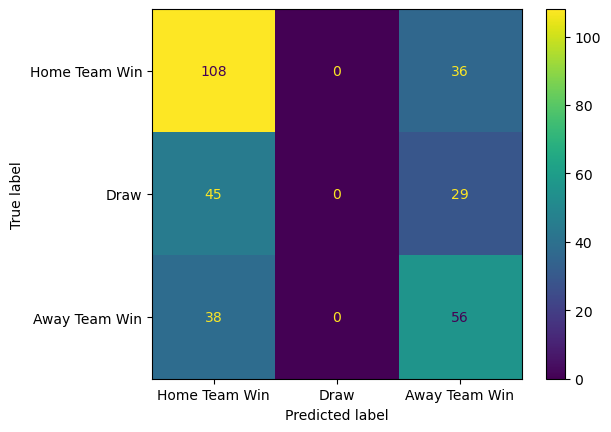

               precision    recall  f1-score   support

Home Team Win       0.46      0.60      0.52        94
         Draw       0.00      0.00      0.00        74
Away Team Win       0.57      0.75      0.64       144

     accuracy                           0.53       312
    macro avg       0.34      0.45      0.39       312
 weighted avg       0.40      0.53      0.45       312


Accuracy:  0.5256410256410257
Recall:  0.5256410256410257
Precision:  0.6375904359007644


----------------------------------------------------------
Predictions for BW


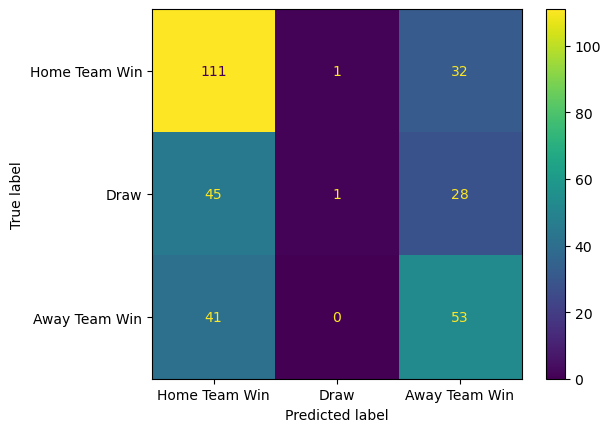

               precision    recall  f1-score   support

Home Team Win       0.47      0.56      0.51        94
         Draw       0.50      0.01      0.03        74
Away Team Win       0.56      0.77      0.65       144

     accuracy                           0.53       312
    macro avg       0.51      0.45      0.40       312
 weighted avg       0.52      0.53      0.46       312


Accuracy:  0.5288461538461539
Recall:  0.5288461538461539
Precision:  0.5199536904255919


----------------------------------------------------------
Predictions for IW


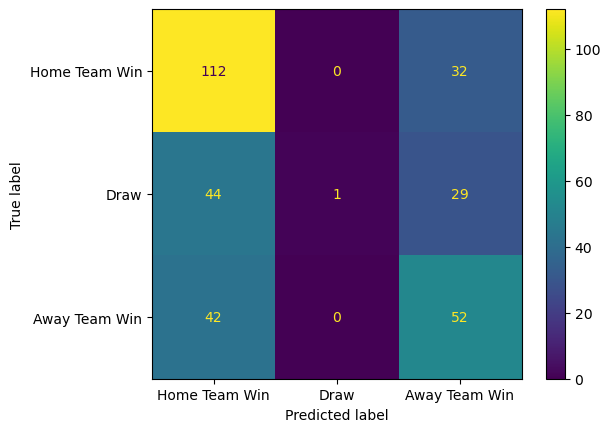

               precision    recall  f1-score   support

Home Team Win       0.46      0.55      0.50        94
         Draw       1.00      0.01      0.03        74
Away Team Win       0.57      0.78      0.65       144

     accuracy                           0.53       312
    macro avg       0.68      0.45      0.39       312
 weighted avg       0.64      0.53      0.46       312


Accuracy:  0.5288461538461539
Recall:  0.5288461538461539
Precision:  0.6368948160983559


----------------------------------------------------------
Predictions for LB


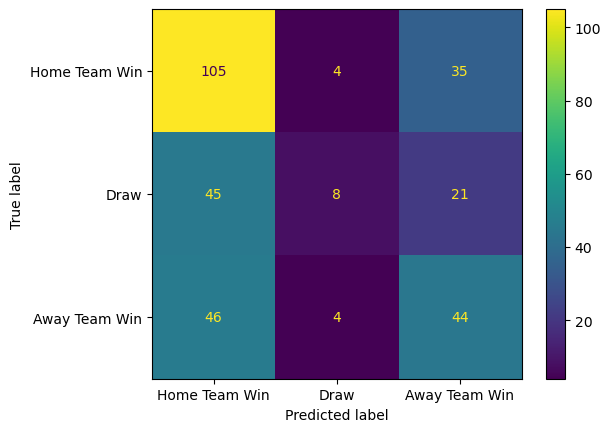

               precision    recall  f1-score   support

Home Team Win       0.44      0.47      0.45        94
         Draw       0.50      0.11      0.18        74
Away Team Win       0.54      0.73      0.62       144

     accuracy                           0.50       312
    macro avg       0.49      0.44      0.42       312
 weighted avg       0.50      0.50      0.46       312


Accuracy:  0.5032051282051282
Recall:  0.5032051282051282
Precision:  0.4984065934065933


----------------------------------------------------------


In [12]:
#Print results
for i in range(len(result_outcomes)):
    print("Predictions for " + clf_title[i])
    prediction_metrics(result_outcomes[i], result_y_predict_decoded[i])

## Multiple layer Neural Network

In [13]:
result_outcomes = [None] * len(features)
result_y_predict_decoded = [None] * len(features)

#Train module with Multiple layer Neural Network
for i in range(len(features)):
    col_features = list(features[i].columns.values)
#     del col_features[20:23]
    features_selected = features[i][col_features].copy(deep=True)
    
    visible = tf.keras.layers.Input(shape=(features_selected.shape[1]))
    hidden1 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(visible)
    hidden2 = tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden1)
    hidden3 = tf.keras.layers.Dense(300, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden2)
    hidden4 = tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden3)
    hidden5 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden4)
    output = tf.keras.layers.Dense(3, activation='softmax')(hidden5)

    clf = tf.keras.Model(inputs=visible, outputs=output)
    print("Predictions for " + clf_title[i])

    clf.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    result_outcomes[i],result_y_predict_decoded[i] = convert_predictions(clf, features_selected, outcomes[i])

Predictions for B365
Epoch 1/250
3/3 - 1s - loss: 1.0972 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - lr: 0.0010 - 1s/epoch - 451ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0775 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - lr: 0.0010 - 19ms/epoch - 6ms/step
Epoch 3/250
3/3 - 0s - loss: 1.0581 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - lr: 0.0010 - 17ms/epoch - 6ms/step
Epoch 4/250
3/3 - 0s - loss: 1.0397 - precision_4: 0.6667 - recall_4: 0.0071 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 5/250
3/3 - 0s - loss: 1.0313 - precision_4: 0.5685 - recall_4: 0.2964 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 6/250
3/3 - 0s - loss: 1.0277 - precision_4: 0.5492 - recall_4: 0.3786 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 7/250
3/3 - 0s - loss: 1.0043 - precision_4: 0.5986 - recall_4: 0.3143 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 8/250
3/3 - 0s - loss: 0.9982 - precision_4: 0.6630 - recall_4: 0.2179 - lr: 0.0010 - 17ms/epoch - 6ms/step
Epoch 9/250
3/3 - 0s - loss: 0.9974 - preci

Epoch 72/250
3/3 - 0s - loss: 0.7910 - precision_4: 0.7019 - recall_4: 0.5214 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 73/250
3/3 - 0s - loss: 0.7831 - precision_4: 0.7083 - recall_4: 0.4857 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 74/250
3/3 - 0s - loss: 0.7916 - precision_4: 0.6963 - recall_4: 0.4750 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 75/250
3/3 - 0s - loss: 0.7785 - precision_4: 0.7020 - recall_4: 0.4964 - lr: 0.0010 - 18ms/epoch - 6ms/step
Epoch 76/250
3/3 - 0s - loss: 0.7580 - precision_4: 0.7186 - recall_4: 0.5107 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 77/250
3/3 - 0s - loss: 0.7706 - precision_4: 0.6845 - recall_4: 0.5036 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 78/250
3/3 - 0s - loss: 0.7747 - precision_4: 0.6667 - recall_4: 0.5071 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 79/250
3/3 - 0s - loss: 0.7564 - precision_4: 0.7143 - recall_4: 0.4821 - lr: 0.0010 - 17ms/epoch - 6ms/step
Epoch 80/250
3/3 - 0s - loss: 0.7573 - precision_4: 0.7258 - recall_4: 0.4821 - 

Epoch 143/250
3/3 - 0s - loss: 0.5039 - precision_4: 0.8150 - recall_4: 0.7393 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 144/250
3/3 - 0s - loss: 0.5061 - precision_4: 0.7895 - recall_4: 0.7500 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 145/250
3/3 - 0s - loss: 0.4768 - precision_4: 0.8346 - recall_4: 0.7571 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 146/250
3/3 - 0s - loss: 0.4715 - precision_4: 0.8314 - recall_4: 0.7750 - lr: 0.0010 - 19ms/epoch - 6ms/step
Epoch 147/250
3/3 - 0s - loss: 0.4509 - precision_4: 0.8301 - recall_4: 0.7679 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 148/250
3/3 - 0s - loss: 0.4435 - precision_4: 0.8366 - recall_4: 0.7679 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 149/250
3/3 - 0s - loss: 0.4245 - precision_4: 0.8423 - recall_4: 0.7821 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 150/250
3/3 - 0s - loss: 0.4444 - precision_4: 0.8577 - recall_4: 0.7964 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 151/250
3/3 - 0s - loss: 0.4214 - precision_4: 0.8473 - recall_4: 

Epoch 214/250
3/3 - 0s - loss: 0.2192 - precision_4: 0.9143 - recall_4: 0.9143 - lr: 0.0010 - 17ms/epoch - 6ms/step
Epoch 215/250
3/3 - 0s - loss: 0.2494 - precision_4: 0.9228 - recall_4: 0.8964 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 216/250
3/3 - 0s - loss: 0.2184 - precision_4: 0.9197 - recall_4: 0.9000 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 217/250
3/3 - 0s - loss: 0.2456 - precision_4: 0.9094 - recall_4: 0.8964 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 218/250
3/3 - 0s - loss: 0.2043 - precision_4: 0.9236 - recall_4: 0.9071 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 219/250
3/3 - 0s - loss: 0.1889 - precision_4: 0.9455 - recall_4: 0.9286 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 220/250
3/3 - 0s - loss: 0.1923 - precision_4: 0.9283 - recall_4: 0.9250 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 221/250
3/3 - 0s - loss: 0.2070 - precision_4: 0.9343 - recall_4: 0.9143 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 222/250
3/3 - 0s - loss: 0.2016 - precision_4: 0.9489 - recall_4: 

Epoch 33/250
3/3 - 0s - loss: 0.2686 - precision_4: 0.9247 - recall_4: 0.9214 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 34/250
3/3 - 0s - loss: 0.2588 - precision_4: 0.9275 - recall_4: 0.9143 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 35/250
3/3 - 0s - loss: 0.2503 - precision_4: 0.9312 - recall_4: 0.9179 - lr: 3.0000e-04 - 21ms/epoch - 7ms/step
Epoch 36/250
3/3 - 0s - loss: 0.2566 - precision_4: 0.9410 - recall_4: 0.9107 - lr: 3.0000e-04 - 20ms/epoch - 7ms/step
Epoch 37/250
3/3 - 0s - loss: 0.2430 - precision_4: 0.9312 - recall_4: 0.9179 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 38/250
3/3 - 0s - loss: 0.2832 - precision_4: 0.9231 - recall_4: 0.9000 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 39/250
3/3 - 0s - loss: 0.2326 - precision_4: 0.9418 - recall_4: 0.9250 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 40/250
3/3 - 0s - loss: 0.2489 - precision_4: 0.9239 - recall_4: 0.9107 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 41/250
3/3 - 0s - loss: 0.2492 - precision

Epoch 102/250
3/3 - 0s - loss: 0.1183 - precision_4: 0.9821 - recall_4: 0.9786 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 103/250
3/3 - 0s - loss: 0.1112 - precision_4: 0.9892 - recall_4: 0.9786 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 104/250
3/3 - 0s - loss: 0.1142 - precision_4: 0.9786 - recall_4: 0.9786 - lr: 3.0000e-04 - 20ms/epoch - 7ms/step
Epoch 105/250
3/3 - 0s - loss: 0.1138 - precision_4: 0.9856 - recall_4: 0.9786 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 106/250
3/3 - 0s - loss: 0.1065 - precision_4: 0.9784 - recall_4: 0.9714 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 107/250
3/3 - 0s - loss: 0.1122 - precision_4: 0.9677 - recall_4: 0.9643 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 108/250
3/3 - 0s - loss: 0.1048 - precision_4: 0.9784 - recall_4: 0.9714 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 109/250
3/3 - 0s - loss: 0.1060 - precision_4: 0.9784 - recall_4: 0.9714 - lr: 3.0000e-04 - 22ms/epoch - 7ms/step
Epoch 110/250
3/3 - 0s - loss: 0.1033 - 

Epoch 171/250
3/3 - 0s - loss: 0.0718 - precision_4: 0.9893 - recall_4: 0.9893 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 172/250
3/3 - 0s - loss: 0.0688 - precision_4: 0.9857 - recall_4: 0.9857 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 173/250
3/3 - 0s - loss: 0.0743 - precision_4: 0.9857 - recall_4: 0.9857 - lr: 3.0000e-04 - 29ms/epoch - 10ms/step
Epoch 174/250
3/3 - 0s - loss: 0.0742 - precision_4: 0.9857 - recall_4: 0.9857 - lr: 3.0000e-04 - 20ms/epoch - 7ms/step
Epoch 175/250
3/3 - 0s - loss: 0.0716 - precision_4: 0.9893 - recall_4: 0.9893 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 176/250
3/3 - 0s - loss: 0.0934 - precision_4: 0.9784 - recall_4: 0.9714 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 177/250
3/3 - 0s - loss: 0.0842 - precision_4: 0.9892 - recall_4: 0.9857 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 178/250
3/3 - 0s - loss: 0.0810 - precision_4: 0.9750 - recall_4: 0.9750 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 179/250
3/3 - 0s - loss: 0.0957 -

Epoch 240/250
3/3 - 0s - loss: 0.0479 - precision_4: 0.9964 - recall_4: 0.9857 - lr: 2.7000e-05 - 23ms/epoch - 8ms/step
Epoch 241/250
3/3 - 0s - loss: 0.0479 - precision_4: 0.9892 - recall_4: 0.9857 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 242/250
3/3 - 0s - loss: 0.0480 - precision_4: 0.9893 - recall_4: 0.9893 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 243/250
3/3 - 0s - loss: 0.0478 - precision_4: 0.9893 - recall_4: 0.9893 - lr: 2.7000e-05 - 23ms/epoch - 8ms/step
Epoch 244/250
3/3 - 0s - loss: 0.0478 - precision_4: 0.9928 - recall_4: 0.9857 - lr: 2.7000e-05 - 19ms/epoch - 6ms/step
Epoch 245/250
3/3 - 0s - loss: 0.0474 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 2.7000e-05 - 20ms/epoch - 7ms/step
Epoch 246/250
3/3 - 0s - loss: 0.0471 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 247/250
3/3 - 0s - loss: 0.0470 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 2.7000e-05 - 26ms/epoch - 9ms/step
Epoch 248/250
3/3 - 0s - loss: 0.0469 - 

Epoch 59/250
3/3 - 0s - loss: 0.0599 - precision_4: 1.0000 - recall_4: 0.9929 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 60/250
3/3 - 0s - loss: 0.0597 - precision_4: 1.0000 - recall_4: 0.9929 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 61/250
3/3 - 0s - loss: 0.0595 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 62/250
3/3 - 0s - loss: 0.0593 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 63/250
3/3 - 0s - loss: 0.0591 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 64/250
3/3 - 0s - loss: 0.0592 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 65/250
3/3 - 0s - loss: 0.0593 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 66/250
3/3 - 0s - loss: 0.0596 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 67/250
3/3 - 0s - loss: 0.0592 - precision

Epoch 128/250
3/3 - 0s - loss: 0.0519 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 129/250
3/3 - 0s - loss: 0.0519 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 130/250
3/3 - 0s - loss: 0.0518 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 131/250
3/3 - 0s - loss: 0.0516 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 132/250
3/3 - 0s - loss: 0.0516 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 133/250
3/3 - 0s - loss: 0.0518 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 2.7000e-05 - 11ms/epoch - 4ms/step
Epoch 134/250
3/3 - 0s - loss: 0.0515 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 135/250
3/3 - 0s - loss: 0.0515 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 136/250
3/3 - 0s - loss: 0.0512 - 

Epoch 197/250
3/3 - 0s - loss: 0.0472 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 198/250
3/3 - 0s - loss: 0.0472 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 199/250
3/3 - 0s - loss: 0.0472 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 200/250
3/3 - 0s - loss: 0.0472 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 201/250
3/3 - 0s - loss: 0.0472 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 202/250
3/3 - 0s - loss: 0.0471 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 19ms/epoch - 6ms/step
Epoch 203/250
3/3 - 0s - loss: 0.0470 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 204/250
3/3 - 0s - loss: 0.0470 - precision_4: 0.9964 - recall_4: 0.9964 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 205/250
3/3 - 0s - loss: 0.0471 - 

3/3 - 0s - loss: 0.0547 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 14ms/epoch - 5ms/step
Epoch 16/250
3/3 - 0s - loss: 0.0546 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 17ms/epoch - 6ms/step
Epoch 17/250
3/3 - 0s - loss: 0.0546 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 18ms/epoch - 6ms/step
Epoch 18/250
3/3 - 0s - loss: 0.0545 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 19ms/epoch - 6ms/step
Epoch 19/250
3/3 - 0s - loss: 0.0545 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 20ms/epoch - 7ms/step
Epoch 20/250
3/3 - 0s - loss: 0.0545 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 21ms/epoch - 7ms/step
Epoch 21/250
3/3 - 0s - loss: 0.0544 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 22ms/epoch - 7ms/step
Epoch 22/250
3/3 - 0s - loss: 0.0544 - precision_4: 0.9929 - recall_4: 0.9929 - lr: 7.2900e-07 - 20ms/epoch - 7ms/step
Epoch 23/250
3/3 - 0s - loss: 0.0543 - precision_4: 0.9929 - 

Epoch 84/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 18ms/epoch - 6ms/step
Epoch 85/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 16ms/epoch - 5ms/step
Epoch 86/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 17ms/epoch - 6ms/step
Epoch 87/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 15ms/epoch - 5ms/step
Epoch 88/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 15ms/epoch - 5ms/step
Epoch 89/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 16ms/epoch - 5ms/step
Epoch 90/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 7.2900e-07 - 17ms/epoch - 6ms/step
Epoch 91/250
3/3 - 0s - loss: 0.0533 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 2.1870e-07 - 16ms/epoch - 5ms/step
Epoch 92/250
3/3 - 0s - loss: 0.0533 - precision

Epoch 153/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 5.3144e-10 - 15ms/epoch - 5ms/step
Epoch 154/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 5.3144e-10 - 16ms/epoch - 5ms/step
Epoch 155/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 13ms/epoch - 4ms/step
Epoch 156/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 16ms/epoch - 5ms/step
Epoch 157/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 15ms/epoch - 5ms/step
Epoch 158/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 13ms/epoch - 4ms/step
Epoch 159/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 15ms/epoch - 5ms/step
Epoch 160/250
3/3 - 0s - loss: 0.0532 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.5943e-10 - 15ms/epoch - 5ms/step
Epoch 161/250
3/3 - 0s - loss: 0.0532 - 

Epoch 12/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 14ms/epoch - 5ms/step
Epoch 13/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 11ms/epoch - 4ms/step
Epoch 14/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 12ms/epoch - 4ms/step
Epoch 15/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 12ms/epoch - 4ms/step
Epoch 16/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 13ms/epoch - 4ms/step
Epoch 17/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 15ms/epoch - 5ms/step
Epoch 18/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 14ms/epoch - 5ms/step
Epoch 19/250
3/3 - 0s - loss: 0.0528 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 1.1623e-13 - 12ms/epoch - 4ms/step
Epoch 20/250
3/3 - 0s - loss: 0.0528 - precision

Epoch 17/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 8.4729e-17 - 14ms/epoch - 5ms/step
Epoch 18/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 8.4729e-17 - 16ms/epoch - 5ms/step
Epoch 19/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 8.4729e-17 - 13ms/epoch - 4ms/step
Epoch 20/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 8.4729e-17 - 12ms/epoch - 4ms/step
Epoch 21/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 8.4729e-17 - 14ms/epoch - 5ms/step
Epoch 22/250
3/3 - 0s - loss: 0.0534 - precision_4: 0.9964 - recall_4: 0.9929 - lr: 2.5419e-17 - 18ms/epoch - 6ms/step
1/1 [==============================] - 0s 33ms/step
Predictions for BW
Epoch 1/250
3/3 - 1s - loss: 1.0893 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 0.0010 - 1s/epoch - 389ms/step
Epoch 2/250
3/3 - 0s - loss: 1.0571 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 0.

Epoch 66/250
3/3 - 0s - loss: 0.8279 - precision_5: 0.6796 - recall_5: 0.5000 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 67/250
3/3 - 0s - loss: 0.8016 - precision_5: 0.7000 - recall_5: 0.5000 - lr: 0.0010 - 16ms/epoch - 5ms/step
Epoch 68/250
3/3 - 0s - loss: 0.8122 - precision_5: 0.6820 - recall_5: 0.5286 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 69/250
3/3 - 0s - loss: 0.8124 - precision_5: 0.6798 - recall_5: 0.4929 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 70/250
3/3 - 0s - loss: 0.8023 - precision_5: 0.7353 - recall_5: 0.4464 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 71/250
3/3 - 0s - loss: 0.7797 - precision_5: 0.7330 - recall_5: 0.5000 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 72/250
3/3 - 0s - loss: 0.8371 - precision_5: 0.6667 - recall_5: 0.5571 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 73/250
3/3 - 0s - loss: 0.7814 - precision_5: 0.6937 - recall_5: 0.5500 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 74/250
3/3 - 0s - loss: 0.8200 - precision_5: 0.7037 - recall_5: 0.4750 - 

Epoch 136/250
3/3 - 0s - loss: 0.5596 - precision_5: 0.7878 - recall_5: 0.6893 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 137/250
3/3 - 0s - loss: 0.5544 - precision_5: 0.7642 - recall_5: 0.6714 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 138/250
3/3 - 0s - loss: 0.5518 - precision_5: 0.7837 - recall_5: 0.6857 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 139/250
3/3 - 0s - loss: 0.5467 - precision_5: 0.7951 - recall_5: 0.6929 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 140/250
3/3 - 0s - loss: 0.5488 - precision_5: 0.8089 - recall_5: 0.7107 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 141/250
3/3 - 0s - loss: 0.5467 - precision_5: 0.8024 - recall_5: 0.7107 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 142/250
3/3 - 0s - loss: 0.5423 - precision_5: 0.7960 - recall_5: 0.7107 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 143/250
3/3 - 0s - loss: 0.5423 - precision_5: 0.7769 - recall_5: 0.6964 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 144/250
3/3 - 0s - loss: 0.5363 - 

Epoch 205/250
3/3 - 0s - loss: 0.3821 - precision_5: 0.8919 - recall_5: 0.8250 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 206/250
3/3 - 0s - loss: 0.3797 - precision_5: 0.8664 - recall_5: 0.8107 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 207/250
3/3 - 0s - loss: 0.3843 - precision_5: 0.8582 - recall_5: 0.8214 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 208/250
3/3 - 0s - loss: 0.3763 - precision_5: 0.8717 - recall_5: 0.8250 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 209/250
3/3 - 0s - loss: 0.3809 - precision_5: 0.8652 - recall_5: 0.8250 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 210/250
3/3 - 0s - loss: 0.3776 - precision_5: 0.8566 - recall_5: 0.8107 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 211/250
3/3 - 0s - loss: 0.3693 - precision_5: 0.8731 - recall_5: 0.8107 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 212/250
3/3 - 0s - loss: 0.3635 - precision_5: 0.8774 - recall_5: 0.8179 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 213/250
3/3 - 0s - loss: 0.3557 - 

3/3 - 0s - loss: 0.4457 - precision_5: 0.8692 - recall_5: 0.8071 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 24/250
3/3 - 0s - loss: 0.4882 - precision_5: 0.8352 - recall_5: 0.7786 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 25/250
3/3 - 0s - loss: 0.4563 - precision_5: 0.8598 - recall_5: 0.8107 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 26/250
3/3 - 0s - loss: 0.4219 - precision_5: 0.8931 - recall_5: 0.8357 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 27/250
3/3 - 0s - loss: 0.4208 - precision_5: 0.8635 - recall_5: 0.8357 - lr: 3.0000e-04 - 20ms/epoch - 7ms/step
Epoch 28/250
3/3 - 0s - loss: 0.4445 - precision_5: 0.8779 - recall_5: 0.8214 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 29/250
3/3 - 0s - loss: 0.4187 - precision_5: 0.8774 - recall_5: 0.8179 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 30/250
3/3 - 0s - loss: 0.4132 - precision_5: 0.8722 - recall_5: 0.8286 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 31/250
3/3 - 0s - loss: 0.4195 - precision_5: 0.8759 - 

Epoch 92/250
3/3 - 0s - loss: 0.2308 - precision_5: 0.9552 - recall_5: 0.9143 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 93/250
3/3 - 0s - loss: 0.2453 - precision_5: 0.9407 - recall_5: 0.9071 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 94/250
3/3 - 0s - loss: 0.2520 - precision_5: 0.9228 - recall_5: 0.8964 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 95/250
3/3 - 0s - loss: 0.2312 - precision_5: 0.9476 - recall_5: 0.9036 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 96/250
3/3 - 0s - loss: 0.2312 - precision_5: 0.9382 - recall_5: 0.9214 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 97/250
3/3 - 0s - loss: 0.2350 - precision_5: 0.9551 - recall_5: 0.9107 - lr: 3.0000e-04 - 13ms/epoch - 4ms/step
Epoch 98/250
3/3 - 0s - loss: 0.2258 - precision_5: 0.9449 - recall_5: 0.9179 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 99/250
3/3 - 0s - loss: 0.2402 - precision_5: 0.9513 - recall_5: 0.9071 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 100/250
3/3 - 0s - loss: 0.2297 - precisio

Epoch 161/250
3/3 - 0s - loss: 0.1258 - precision_5: 0.9709 - recall_5: 0.9536 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 162/250
3/3 - 0s - loss: 0.1243 - precision_5: 0.9819 - recall_5: 0.9714 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 163/250
3/3 - 0s - loss: 0.1407 - precision_5: 0.9748 - recall_5: 0.9679 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 164/250
3/3 - 0s - loss: 0.1444 - precision_5: 0.9603 - recall_5: 0.9500 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 165/250
3/3 - 0s - loss: 0.1412 - precision_5: 0.9743 - recall_5: 0.9464 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 166/250
3/3 - 0s - loss: 0.1330 - precision_5: 0.9783 - recall_5: 0.9679 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 167/250
3/3 - 0s - loss: 0.1436 - precision_5: 0.9534 - recall_5: 0.9500 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 168/250
3/3 - 0s - loss: 0.1227 - precision_5: 0.9783 - recall_5: 0.9643 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 169/250
3/3 - 0s - loss: 0.1144 - 

Epoch 230/250
3/3 - 0s - loss: 0.0912 - precision_5: 0.9856 - recall_5: 0.9786 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 231/250
3/3 - 0s - loss: 0.0864 - precision_5: 0.9964 - recall_5: 0.9893 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 232/250
3/3 - 0s - loss: 0.0925 - precision_5: 0.9964 - recall_5: 0.9857 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 233/250
3/3 - 0s - loss: 0.0867 - precision_5: 0.9964 - recall_5: 0.9893 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 234/250
3/3 - 0s - loss: 0.0877 - precision_5: 0.9893 - recall_5: 0.9893 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 235/250
3/3 - 0s - loss: 0.0881 - precision_5: 0.9893 - recall_5: 0.9893 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 236/250
3/3 - 0s - loss: 0.0859 - precision_5: 0.9928 - recall_5: 0.9893 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 237/250
3/3 - 0s - loss: 0.0839 - precision_5: 0.9964 - recall_5: 0.9929 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 238/250
3/3 - 0s - loss: 0.0830 - 

Epoch 49/250
3/3 - 0s - loss: 0.1581 - precision_5: 0.9748 - recall_5: 0.9644 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 50/250
3/3 - 0s - loss: 0.1567 - precision_5: 0.9711 - recall_5: 0.9573 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 51/250
3/3 - 0s - loss: 0.1549 - precision_5: 0.9712 - recall_5: 0.9609 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 52/250
3/3 - 0s - loss: 0.1548 - precision_5: 0.9711 - recall_5: 0.9573 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 53/250
3/3 - 0s - loss: 0.1537 - precision_5: 0.9677 - recall_5: 0.9609 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 54/250
3/3 - 0s - loss: 0.1523 - precision_5: 0.9677 - recall_5: 0.9609 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 55/250
3/3 - 0s - loss: 0.1522 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 56/250
3/3 - 0s - loss: 0.1508 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 57/250
3/3 - 0s - loss: 0.1500 - precision

Epoch 118/250
3/3 - 0s - loss: 0.1260 - precision_5: 0.9784 - recall_5: 0.9680 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 119/250
3/3 - 0s - loss: 0.1261 - precision_5: 0.9784 - recall_5: 0.9680 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 120/250
3/3 - 0s - loss: 0.1258 - precision_5: 0.9748 - recall_5: 0.9644 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 121/250
3/3 - 0s - loss: 0.1250 - precision_5: 0.9748 - recall_5: 0.9644 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 122/250
3/3 - 0s - loss: 0.1244 - precision_5: 0.9783 - recall_5: 0.9644 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 123/250
3/3 - 0s - loss: 0.1239 - precision_5: 0.9783 - recall_5: 0.9644 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 124/250
3/3 - 0s - loss: 0.1227 - precision_5: 0.9820 - recall_5: 0.9715 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 125/250
3/3 - 0s - loss: 0.1229 - precision_5: 0.9784 - recall_5: 0.9680 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 126/250
3/3 - 0s - loss: 0.1228 - 

Epoch 187/250
3/3 - 0s - loss: 0.1117 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 11ms/epoch - 4ms/step
Epoch 188/250
3/3 - 0s - loss: 0.1115 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 189/250
3/3 - 0s - loss: 0.1113 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 190/250
3/3 - 0s - loss: 0.1113 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 191/250
3/3 - 0s - loss: 0.1110 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 192/250
3/3 - 0s - loss: 0.1110 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 193/250
3/3 - 0s - loss: 0.1109 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 194/250
3/3 - 0s - loss: 0.1107 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 195/250
3/3 - 0s - loss: 0.1111 - 

Epoch 5/250
3/3 - 0s - loss: 0.1119 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 8.1000e-06 - 20ms/epoch - 7ms/step
Epoch 6/250
3/3 - 0s - loss: 0.1116 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 8.1000e-06 - 23ms/epoch - 8ms/step
Epoch 7/250
3/3 - 0s - loss: 0.1117 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 8/250
3/3 - 0s - loss: 0.1116 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 9/250
3/3 - 0s - loss: 0.1116 - precision_5: 0.9750 - recall_5: 0.9715 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 10/250
3/3 - 0s - loss: 0.1117 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 11/250
3/3 - 0s - loss: 0.1113 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 12/250
3/3 - 0s - loss: 0.1108 - precision_5: 0.9713 - recall_5: 0.9644 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 13/250
3/3 - 0s - loss: 0.1108 - precision_5: 0

Epoch 74/250
3/3 - 0s - loss: 0.1056 - precision_5: 0.9820 - recall_5: 0.9715 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 75/250
3/3 - 0s - loss: 0.1054 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 76/250
3/3 - 0s - loss: 0.1055 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 77/250
3/3 - 0s - loss: 0.1057 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 8.1000e-06 - 12ms/epoch - 4ms/step
Epoch 78/250
3/3 - 0s - loss: 0.1059 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 12ms/epoch - 4ms/step
Epoch 79/250
3/3 - 0s - loss: 0.1061 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 80/250
3/3 - 0s - loss: 0.1062 - precision_5: 0.9784 - recall_5: 0.9680 - lr: 8.1000e-06 - 12ms/epoch - 4ms/step
Epoch 81/250
3/3 - 0s - loss: 0.1058 - precision_5: 0.9749 - recall_5: 0.9680 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 82/250
3/3 - 0s - loss: 0.1055 - precision

Epoch 143/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 2.4300e-06 - 14ms/epoch - 5ms/step
Epoch 144/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 145/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 2.4300e-06 - 14ms/epoch - 5ms/step
Epoch 146/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 7.2900e-07 - 14ms/epoch - 5ms/step
Epoch 147/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 7.2900e-07 - 17ms/epoch - 6ms/step
Epoch 148/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 7.2900e-07 - 14ms/epoch - 5ms/step
Epoch 149/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 7.2900e-07 - 15ms/epoch - 5ms/step
Epoch 150/250
3/3 - 0s - loss: 0.1026 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 7.2900e-07 - 14ms/epoch - 5ms/step
Epoch 151/250
3/3 - 0s - loss: 0.1026 - 

Epoch 212/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 1.9683e-08 - 16ms/epoch - 5ms/step
Epoch 213/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 1.9683e-08 - 14ms/epoch - 5ms/step
Epoch 214/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 1.9683e-08 - 15ms/epoch - 5ms/step
Epoch 215/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 1.9683e-08 - 15ms/epoch - 5ms/step
Epoch 216/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 1.9683e-08 - 16ms/epoch - 5ms/step
Epoch 217/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 5.9049e-09 - 15ms/epoch - 5ms/step
Epoch 218/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 5.9049e-09 - 15ms/epoch - 5ms/step
Epoch 219/250
3/3 - 0s - loss: 0.1022 - precision_5: 0.9857 - recall_5: 0.9786 - lr: 5.9049e-09 - 15ms/epoch - 5ms/step
Epoch 220/250
3/3 - 0s - loss: 0.1022 - 

Epoch 3/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 25ms/epoch - 8ms/step
Epoch 4/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 19ms/epoch - 6ms/step
Epoch 5/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 20ms/epoch - 7ms/step
Epoch 6/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 19ms/epoch - 6ms/step
Epoch 7/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 16ms/epoch - 5ms/step
Epoch 8/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 14ms/epoch - 5ms/step
Epoch 9/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 14ms/epoch - 5ms/step
Epoch 10/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9821 - recall_5: 0.9751 - lr: 1.4349e-11 - 15ms/epoch - 5ms/step
Epoch 11/250
3/3 - 0s - loss: 0.1024 - precision_5: 0.9

1/1 [==============================] - 0s 37ms/step
Epoch 1/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 24ms/epoch - 8ms/step
Epoch 2/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 18ms/epoch - 6ms/step
Epoch 3/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 17ms/epoch - 6ms/step
Epoch 4/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 24ms/epoch - 8ms/step
Epoch 5/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 16ms/epoch - 5ms/step
Epoch 6/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 21ms/epoch - 7ms/step
Epoch 7/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 31ms/epoch - 10ms/step
Epoch 8/250
3/3 - 0s - loss: 0.1035 - precision_5: 0.9785 - recall_5: 0.9715 - lr: 1.0460e-14 - 17ms/epoch - 6ms/step
Epo

Epoch 23/250
3/3 - 0s - loss: 0.9513 - precision_6: 0.6541 - recall_6: 0.3714 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 24/250
3/3 - 0s - loss: 0.9383 - precision_6: 0.6781 - recall_6: 0.3536 - lr: 0.0010 - 28ms/epoch - 9ms/step
Epoch 25/250
3/3 - 0s - loss: 0.9422 - precision_6: 0.6752 - recall_6: 0.3786 - lr: 0.0010 - 24ms/epoch - 8ms/step
Epoch 26/250
3/3 - 0s - loss: 0.9374 - precision_6: 0.6689 - recall_6: 0.3607 - lr: 0.0010 - 24ms/epoch - 8ms/step
Epoch 27/250
3/3 - 0s - loss: 0.9353 - precision_6: 0.6781 - recall_6: 0.3536 - lr: 0.0010 - 24ms/epoch - 8ms/step
Epoch 28/250
3/3 - 0s - loss: 0.9296 - precision_6: 0.6797 - recall_6: 0.3714 - lr: 0.0010 - 26ms/epoch - 9ms/step
Epoch 29/250
3/3 - 0s - loss: 0.9239 - precision_6: 0.6591 - recall_6: 0.4143 - lr: 0.0010 - 21ms/epoch - 7ms/step
Epoch 30/250
3/3 - 0s - loss: 0.9252 - precision_6: 0.6289 - recall_6: 0.4357 - lr: 0.0010 - 18ms/epoch - 6ms/step
Epoch 31/250
3/3 - 0s - loss: 0.9202 - precision_6: 0.6281 - recall_6: 0.4464 - 

Epoch 95/250
3/3 - 0s - loss: 0.7493 - precision_6: 0.7085 - recall_6: 0.5036 - lr: 0.0010 - 26ms/epoch - 9ms/step
Epoch 96/250
3/3 - 0s - loss: 0.7512 - precision_6: 0.6776 - recall_6: 0.5179 - lr: 0.0010 - 25ms/epoch - 8ms/step
Epoch 97/250
3/3 - 0s - loss: 0.7764 - precision_6: 0.6842 - recall_6: 0.5571 - lr: 0.0010 - 23ms/epoch - 8ms/step
Epoch 98/250
3/3 - 0s - loss: 0.7189 - precision_6: 0.7072 - recall_6: 0.5607 - lr: 0.0010 - 20ms/epoch - 7ms/step
Epoch 99/250
3/3 - 0s - loss: 0.7629 - precision_6: 0.6954 - recall_6: 0.4893 - lr: 0.0010 - 21ms/epoch - 7ms/step
Epoch 100/250
3/3 - 0s - loss: 0.7582 - precision_6: 0.6837 - recall_6: 0.4786 - lr: 0.0010 - 22ms/epoch - 7ms/step
Epoch 101/250
3/3 - 0s - loss: 0.7357 - precision_6: 0.7353 - recall_6: 0.5357 - lr: 0.0010 - 21ms/epoch - 7ms/step
Epoch 102/250
3/3 - 0s - loss: 0.7654 - precision_6: 0.7136 - recall_6: 0.5250 - lr: 0.0010 - 35ms/epoch - 12ms/step
Epoch 103/250
3/3 - 0s - loss: 0.7266 - precision_6: 0.6740 - recall_6: 0.54

Epoch 166/250
3/3 - 0s - loss: 0.5180 - precision_6: 0.7882 - recall_6: 0.7179 - lr: 0.0010 - 20ms/epoch - 7ms/step
Epoch 167/250
3/3 - 0s - loss: 0.4914 - precision_6: 0.8281 - recall_6: 0.7571 - lr: 0.0010 - 23ms/epoch - 8ms/step
Epoch 168/250
3/3 - 0s - loss: 0.4457 - precision_6: 0.8610 - recall_6: 0.7964 - lr: 0.0010 - 19ms/epoch - 6ms/step
Epoch 169/250
3/3 - 0s - loss: 0.4601 - precision_6: 0.8521 - recall_6: 0.7821 - lr: 0.0010 - 22ms/epoch - 7ms/step
Epoch 170/250
3/3 - 0s - loss: 0.4426 - precision_6: 0.8446 - recall_6: 0.7571 - lr: 0.0010 - 20ms/epoch - 7ms/step
Epoch 171/250
3/3 - 0s - loss: 0.4307 - precision_6: 0.8750 - recall_6: 0.8000 - lr: 0.0010 - 24ms/epoch - 8ms/step
Epoch 172/250
3/3 - 0s - loss: 0.4565 - precision_6: 0.8315 - recall_6: 0.7929 - lr: 0.0010 - 20ms/epoch - 7ms/step
Epoch 173/250
3/3 - 0s - loss: 0.4320 - precision_6: 0.8231 - recall_6: 0.7643 - lr: 0.0010 - 29ms/epoch - 10ms/step
Epoch 174/250
3/3 - 0s - loss: 0.3916 - precision_6: 0.8808 - recall_6:

Epoch 235/250
3/3 - 0s - loss: 0.2199 - precision_6: 0.9556 - recall_6: 0.9214 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 236/250
3/3 - 0s - loss: 0.2275 - precision_6: 0.9442 - recall_6: 0.9071 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 237/250
3/3 - 0s - loss: 0.2161 - precision_6: 0.9412 - recall_6: 0.9143 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 238/250
3/3 - 0s - loss: 0.2262 - precision_6: 0.9449 - recall_6: 0.9179 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 239/250
3/3 - 0s - loss: 0.2107 - precision_6: 0.9412 - recall_6: 0.9143 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 240/250
3/3 - 0s - loss: 0.2171 - precision_6: 0.9515 - recall_6: 0.9107 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 241/250
3/3 - 0s - loss: 0.2174 - precision_6: 0.9375 - recall_6: 0.9107 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 242/250
3/3 - 0s - loss: 0.2167 - precision_6: 0.9373 - recall_6: 0.9071 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 243/250
3/3 - 0s - loss: 0.2269 - 

Epoch 54/250
3/3 - 0s - loss: 0.2602 - precision_6: 0.9407 - recall_6: 0.9071 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 55/250
3/3 - 0s - loss: 0.2626 - precision_6: 0.9185 - recall_6: 0.8857 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 56/250
3/3 - 0s - loss: 0.2606 - precision_6: 0.9222 - recall_6: 0.8893 - lr: 3.0000e-04 - 18ms/epoch - 6ms/step
Epoch 57/250
3/3 - 0s - loss: 0.2822 - precision_6: 0.9257 - recall_6: 0.8893 - lr: 3.0000e-04 - 19ms/epoch - 6ms/step
Epoch 58/250
3/3 - 0s - loss: 0.2589 - precision_6: 0.9299 - recall_6: 0.9000 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 59/250
3/3 - 0s - loss: 0.2668 - precision_6: 0.9213 - recall_6: 0.8786 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 60/250
3/3 - 0s - loss: 0.2447 - precision_6: 0.9481 - recall_6: 0.9143 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 61/250
3/3 - 0s - loss: 0.2457 - precision_6: 0.9591 - recall_6: 0.9214 - lr: 3.0000e-04 - 13ms/epoch - 4ms/step
Epoch 62/250
3/3 - 0s - loss: 0.2568 - precision

Epoch 123/250
3/3 - 0s - loss: 0.1571 - precision_6: 0.9639 - recall_6: 0.9536 - lr: 9.0000e-05 - 19ms/epoch - 6ms/step
Epoch 124/250
3/3 - 0s - loss: 0.1564 - precision_6: 0.9639 - recall_6: 0.9536 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 125/250
3/3 - 0s - loss: 0.1571 - precision_6: 0.9639 - recall_6: 0.9536 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 126/250
3/3 - 0s - loss: 0.1570 - precision_6: 0.9745 - recall_6: 0.9571 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 127/250
3/3 - 0s - loss: 0.1561 - precision_6: 0.9745 - recall_6: 0.9571 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 128/250
3/3 - 0s - loss: 0.1538 - precision_6: 0.9674 - recall_6: 0.9536 - lr: 9.0000e-05 - 16ms/epoch - 5ms/step
Epoch 129/250
3/3 - 0s - loss: 0.1567 - precision_6: 0.9604 - recall_6: 0.9536 - lr: 9.0000e-05 - 12ms/epoch - 4ms/step
Epoch 130/250
3/3 - 0s - loss: 0.1587 - precision_6: 0.9568 - recall_6: 0.9500 - lr: 9.0000e-05 - 16ms/epoch - 5ms/step
Epoch 131/250
3/3 - 0s - loss: 0.1554 - 

Epoch 192/250
3/3 - 0s - loss: 0.1297 - precision_6: 0.9781 - recall_6: 0.9571 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 193/250
3/3 - 0s - loss: 0.1311 - precision_6: 0.9746 - recall_6: 0.9607 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 194/250
3/3 - 0s - loss: 0.1308 - precision_6: 0.9745 - recall_6: 0.9571 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 195/250
3/3 - 0s - loss: 0.1307 - precision_6: 0.9783 - recall_6: 0.9679 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 196/250
3/3 - 0s - loss: 0.1299 - precision_6: 0.9784 - recall_6: 0.9714 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 197/250
3/3 - 0s - loss: 0.1291 - precision_6: 0.9747 - recall_6: 0.9643 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 198/250
3/3 - 0s - loss: 0.1304 - precision_6: 0.9747 - recall_6: 0.9643 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 199/250
3/3 - 0s - loss: 0.1297 - precision_6: 0.9783 - recall_6: 0.9643 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 200/250
3/3 - 0s - loss: 0.1284 - 

Epoch 10/250
3/3 - 0s - loss: 0.1388 - precision_6: 0.9784 - recall_6: 0.9680 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 11/250
3/3 - 0s - loss: 0.1415 - precision_6: 0.9748 - recall_6: 0.9644 - lr: 9.0000e-05 - 13ms/epoch - 4ms/step
Epoch 12/250
3/3 - 0s - loss: 0.1391 - precision_6: 0.9821 - recall_6: 0.9751 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 13/250
3/3 - 0s - loss: 0.1345 - precision_6: 0.9784 - recall_6: 0.9680 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 14/250
3/3 - 0s - loss: 0.1344 - precision_6: 0.9747 - recall_6: 0.9609 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 15/250
3/3 - 0s - loss: 0.1348 - precision_6: 0.9748 - recall_6: 0.9644 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 16/250
3/3 - 0s - loss: 0.1325 - precision_6: 0.9820 - recall_6: 0.9715 - lr: 9.0000e-05 - 16ms/epoch - 5ms/step
Epoch 17/250
3/3 - 0s - loss: 0.1301 - precision_6: 0.9821 - recall_6: 0.9751 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 18/250
3/3 - 0s - loss: 0.1285 - precision

Epoch 79/250
3/3 - 0s - loss: 0.1097 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 80/250
3/3 - 0s - loss: 0.1098 - precision_6: 0.9857 - recall_6: 0.9786 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 81/250
3/3 - 0s - loss: 0.1099 - precision_6: 0.9857 - recall_6: 0.9786 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 82/250
3/3 - 0s - loss: 0.1099 - precision_6: 0.9857 - recall_6: 0.9786 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 83/250
3/3 - 0s - loss: 0.1095 - precision_6: 0.9857 - recall_6: 0.9786 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 84/250
3/3 - 0s - loss: 0.1088 - precision_6: 0.9857 - recall_6: 0.9786 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 85/250
3/3 - 0s - loss: 0.1090 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 86/250
3/3 - 0s - loss: 0.1092 - precision_6: 0.9822 - recall_6: 0.9822 - lr: 2.7000e-05 - 12ms/epoch - 4ms/step
Epoch 87/250
3/3 - 0s - loss: 0.1101 - precision

Epoch 148/250
3/3 - 0s - loss: 0.1030 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 149/250
3/3 - 0s - loss: 0.1015 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 150/250
3/3 - 0s - loss: 0.1017 - precision_6: 0.9893 - recall_6: 0.9893 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 151/250
3/3 - 0s - loss: 0.1021 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 152/250
3/3 - 0s - loss: 0.1015 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 153/250
3/3 - 0s - loss: 0.1009 - precision_6: 0.9893 - recall_6: 0.9893 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 154/250
3/3 - 0s - loss: 0.1017 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 155/250
3/3 - 0s - loss: 0.1022 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 156/250
3/3 - 0s - loss: 0.1010 - 

Epoch 217/250
3/3 - 0s - loss: 0.0943 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 218/250
3/3 - 0s - loss: 0.0943 - precision_6: 0.9928 - recall_6: 0.9858 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 219/250
3/3 - 0s - loss: 0.0937 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 220/250
3/3 - 0s - loss: 0.0935 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 221/250
3/3 - 0s - loss: 0.0936 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 222/250
3/3 - 0s - loss: 0.0935 - precision_6: 0.9928 - recall_6: 0.9858 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 223/250
3/3 - 0s - loss: 0.0936 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 224/250
3/3 - 0s - loss: 0.0934 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 225/250
3/3 - 0s - loss: 0.0932 - 

Epoch 36/250
3/3 - 0s - loss: 0.0847 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 37/250
3/3 - 0s - loss: 0.0843 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 38/250
3/3 - 0s - loss: 0.0840 - precision_6: 0.9928 - recall_6: 0.9858 - lr: 2.7000e-05 - 21ms/epoch - 7ms/step
Epoch 39/250
3/3 - 0s - loss: 0.0842 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 18ms/epoch - 6ms/step
Epoch 40/250
3/3 - 0s - loss: 0.0842 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 41/250
3/3 - 0s - loss: 0.0845 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 42/250
3/3 - 0s - loss: 0.0839 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 43/250
3/3 - 0s - loss: 0.0838 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 44/250
3/3 - 0s - loss: 0.0842 - precision

Epoch 105/250
3/3 - 0s - loss: 0.0771 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 19ms/epoch - 6ms/step
Epoch 106/250
3/3 - 0s - loss: 0.0772 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 13ms/epoch - 4ms/step
Epoch 107/250
3/3 - 0s - loss: 0.0773 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 12ms/epoch - 4ms/step
Epoch 108/250
3/3 - 0s - loss: 0.0771 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 109/250
3/3 - 0s - loss: 0.0770 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 16ms/epoch - 5ms/step
Epoch 110/250
3/3 - 0s - loss: 0.0768 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 111/250
3/3 - 0s - loss: 0.0775 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 11ms/epoch - 4ms/step
Epoch 112/250
3/3 - 0s - loss: 0.0773 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.7000e-05 - 12ms/epoch - 4ms/step
Epoch 113/250
3/3 - 0s - loss: 0.0771 - 

Epoch 174/250
3/3 - 0s - loss: 0.0717 - precision_6: 0.9964 - recall_6: 0.9929 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 175/250
3/3 - 0s - loss: 0.0715 - precision_6: 0.9964 - recall_6: 0.9929 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 176/250
3/3 - 0s - loss: 0.0713 - precision_6: 0.9964 - recall_6: 0.9929 - lr: 8.1000e-06 - 19ms/epoch - 6ms/step
Epoch 177/250
3/3 - 0s - loss: 0.0713 - precision_6: 0.9964 - recall_6: 0.9893 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 178/250
3/3 - 0s - loss: 0.0712 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 179/250
3/3 - 0s - loss: 0.0713 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 180/250
3/3 - 0s - loss: 0.0713 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 181/250
3/3 - 0s - loss: 0.0714 - precision_6: 0.9929 - recall_6: 0.9893 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 182/250
3/3 - 0s - loss: 0.0713 - 

Epoch 243/250
3/3 - 0s - loss: 0.0697 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 15ms/epoch - 5ms/step
Epoch 244/250
3/3 - 0s - loss: 0.0697 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 15ms/epoch - 5ms/step
Epoch 245/250
3/3 - 0s - loss: 0.0697 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 17ms/epoch - 6ms/step
Epoch 246/250
3/3 - 0s - loss: 0.0696 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 247/250
3/3 - 0s - loss: 0.0696 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 13ms/epoch - 4ms/step
Epoch 248/250
3/3 - 0s - loss: 0.0696 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 249/250
3/3 - 0s - loss: 0.0696 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 250/250
3/3 - 0s - loss: 0.0696 - precision_6: 0.9929 - recall_6: 0.9929 - lr: 2.4300e-06 - 18ms/epoch - 6ms/step
1/1 [==============================] - 0

Epoch 62/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 63/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9858 - recall_6: 0.9858 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 64/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 18ms/epoch - 6ms/step
Epoch 65/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 14ms/epoch - 5ms/step
Epoch 66/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 67/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 15ms/epoch - 5ms/step
Epoch 68/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 15ms/epoch - 5ms/step
Epoch 69/250
3/3 - 0s - loss: 0.0837 - precision_6: 0.9857 - recall_6: 0.9822 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 70/250
3/3 - 0s - loss: 0.0836 - precision

Epoch 131/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 14ms/epoch - 5ms/step
Epoch 132/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 14ms/epoch - 5ms/step
Epoch 133/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 15ms/epoch - 5ms/step
Epoch 134/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 17ms/epoch - 6ms/step
Epoch 135/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 17ms/epoch - 6ms/step
Epoch 136/250
3/3 - 0s - loss: 0.0819 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 137/250
3/3 - 0s - loss: 0.0818 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 17ms/epoch - 6ms/step
Epoch 138/250
3/3 - 0s - loss: 0.0818 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 139/250
3/3 - 0s - loss: 0.0818 - 

Epoch 200/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 14ms/epoch - 5ms/step
Epoch 201/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 16ms/epoch - 5ms/step
Epoch 202/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 14ms/epoch - 5ms/step
Epoch 203/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 17ms/epoch - 6ms/step
Epoch 204/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 15ms/epoch - 5ms/step
Epoch 205/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 16ms/epoch - 5ms/step
Epoch 206/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 13ms/epoch - 4ms/step
Epoch 207/250
3/3 - 0s - loss: 0.0814 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 5.9049e-09 - 14ms/epoch - 5ms/step
Epoch 208/250
3/3 - 0s - loss: 0.0814 - 

Epoch 9/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 4.3047e-12 - 14ms/epoch - 5ms/step
Epoch 10/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 4.3047e-12 - 14ms/epoch - 5ms/step
Epoch 11/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 4.3047e-12 - 15ms/epoch - 5ms/step
Epoch 12/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 1.2914e-12 - 15ms/epoch - 5ms/step
Epoch 13/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 1.2914e-12 - 13ms/epoch - 4ms/step
Epoch 14/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 1.2914e-12 - 14ms/epoch - 5ms/step
Epoch 15/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 1.2914e-12 - 14ms/epoch - 5ms/step
Epoch 16/250
3/3 - 0s - loss: 0.0791 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 1.2914e-12 - 14ms/epoch - 5ms/step
Epoch 17/250
3/3 - 0s - loss: 0.0791 - precision_

Epoch 19/250
3/3 - 0s - loss: 0.0809 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 3.1381e-15 - 13ms/epoch - 4ms/step
Epoch 20/250
3/3 - 0s - loss: 0.0809 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 3.1381e-15 - 14ms/epoch - 5ms/step
Epoch 21/250
3/3 - 0s - loss: 0.0809 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 3.1381e-15 - 15ms/epoch - 5ms/step
Epoch 22/250
3/3 - 0s - loss: 0.0809 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 9.4143e-16 - 15ms/epoch - 5ms/step
Epoch 23/250
3/3 - 0s - loss: 0.0809 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 9.4143e-16 - 20ms/epoch - 7ms/step
1/1 [==============================] - 0s 31ms/step
Epoch 1/250
3/3 - 0s - loss: 0.0805 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 9.4143e-16 - 22ms/epoch - 7ms/step
Epoch 2/250
3/3 - 0s - loss: 0.0805 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 9.4143e-16 - 13ms/epoch - 4ms/step
Epoch 3/250
3/3 - 0s - loss: 0.0805 - precision_6: 0.9893 - recall_6: 0.9858 - lr: 9.4143e-16 - 14ms/epoch - 5ms/step

Epoch 45/250
3/3 - 0s - loss: 0.9276 - precision_7: 0.6145 - recall_7: 0.3643 - lr: 0.0010 - 26ms/epoch - 9ms/step
Epoch 46/250
3/3 - 0s - loss: 0.9324 - precision_7: 0.6215 - recall_7: 0.3929 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 47/250
3/3 - 0s - loss: 0.9267 - precision_7: 0.6114 - recall_7: 0.3821 - lr: 0.0010 - 18ms/epoch - 6ms/step
Epoch 48/250
3/3 - 0s - loss: 0.9268 - precision_7: 0.6011 - recall_7: 0.3821 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 49/250
3/3 - 0s - loss: 0.9320 - precision_7: 0.6045 - recall_7: 0.3821 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 50/250
3/3 - 0s - loss: 0.9249 - precision_7: 0.6770 - recall_7: 0.3893 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 51/250
3/3 - 0s - loss: 0.9119 - precision_7: 0.6774 - recall_7: 0.3750 - lr: 0.0010 - 18ms/epoch - 6ms/step
Epoch 52/250
3/3 - 0s - loss: 0.9181 - precision_7: 0.6235 - recall_7: 0.3786 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 53/250
3/3 - 0s - loss: 0.9078 - precision_7: 0.6667 - recall_7: 0.3571 - 

3/3 - 0s - loss: 0.7817 - precision_7: 0.6796 - recall_7: 0.5000 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 117/250
3/3 - 0s - loss: 0.7662 - precision_7: 0.6923 - recall_7: 0.5464 - lr: 0.0010 - 12ms/epoch - 4ms/step
Epoch 118/250
3/3 - 0s - loss: 0.7683 - precision_7: 0.6930 - recall_7: 0.5643 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 119/250
3/3 - 0s - loss: 0.7519 - precision_7: 0.6912 - recall_7: 0.5357 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 120/250
3/3 - 0s - loss: 0.7665 - precision_7: 0.6864 - recall_7: 0.5393 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 121/250
3/3 - 0s - loss: 0.7627 - precision_7: 0.6957 - recall_7: 0.5143 - lr: 0.0010 - 13ms/epoch - 4ms/step
Epoch 122/250
3/3 - 0s - loss: 0.7543 - precision_7: 0.7097 - recall_7: 0.5500 - lr: 0.0010 - 14ms/epoch - 5ms/step
Epoch 123/250
3/3 - 0s - loss: 0.7710 - precision_7: 0.6881 - recall_7: 0.5357 - lr: 0.0010 - 15ms/epoch - 5ms/step
Epoch 124/250
3/3 - 0s - loss: 0.7537 - precision_7: 0.7217 - recall_7: 0.5464 - lr: 0

Epoch 185/250
3/3 - 0s - loss: 0.6287 - precision_7: 0.7742 - recall_7: 0.6000 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 186/250
3/3 - 0s - loss: 0.6308 - precision_7: 0.7964 - recall_7: 0.6286 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 187/250
3/3 - 0s - loss: 0.6259 - precision_7: 0.7904 - recall_7: 0.6464 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 188/250
3/3 - 0s - loss: 0.6263 - precision_7: 0.7873 - recall_7: 0.6214 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 189/250
3/3 - 0s - loss: 0.6214 - precision_7: 0.7817 - recall_7: 0.6393 - lr: 3.0000e-04 - 17ms/epoch - 6ms/step
Epoch 190/250
3/3 - 0s - loss: 0.6210 - precision_7: 0.7778 - recall_7: 0.6250 - lr: 3.0000e-04 - 12ms/epoch - 4ms/step
Epoch 191/250
3/3 - 0s - loss: 0.6235 - precision_7: 0.7702 - recall_7: 0.6464 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 192/250
3/3 - 0s - loss: 0.6224 - precision_7: 0.7660 - recall_7: 0.6429 - lr: 3.0000e-04 - 13ms/epoch - 4ms/step
Epoch 193/250
3/3 - 0s - loss: 0.6147 - 

Epoch 3/250
3/3 - 0s - loss: 0.7299 - precision_7: 0.7520 - recall_7: 0.6607 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 4/250
3/3 - 0s - loss: 0.7338 - precision_7: 0.7605 - recall_7: 0.6464 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 5/250
3/3 - 0s - loss: 0.7062 - precision_7: 0.7716 - recall_7: 0.6393 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 6/250
3/3 - 0s - loss: 0.7008 - precision_7: 0.7500 - recall_7: 0.6321 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 7/250
3/3 - 0s - loss: 0.6939 - precision_7: 0.7619 - recall_7: 0.6286 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 8/250
3/3 - 0s - loss: 0.7116 - precision_7: 0.7322 - recall_7: 0.6250 - lr: 3.0000e-04 - 14ms/epoch - 5ms/step
Epoch 9/250
3/3 - 0s - loss: 0.6854 - precision_7: 0.7807 - recall_7: 0.6357 - lr: 3.0000e-04 - 16ms/epoch - 5ms/step
Epoch 10/250
3/3 - 0s - loss: 0.6881 - precision_7: 0.7773 - recall_7: 0.6357 - lr: 3.0000e-04 - 15ms/epoch - 5ms/step
Epoch 11/250
3/3 - 0s - loss: 0.6985 - precision_7: 0.7

Epoch 72/250
3/3 - 0s - loss: 0.5718 - precision_7: 0.7872 - recall_7: 0.6607 - lr: 9.0000e-05 - 13ms/epoch - 4ms/step
Epoch 73/250
3/3 - 0s - loss: 0.5741 - precision_7: 0.7941 - recall_7: 0.6750 - lr: 9.0000e-05 - 14ms/epoch - 5ms/step
Epoch 74/250
3/3 - 0s - loss: 0.5697 - precision_7: 0.8085 - recall_7: 0.6786 - lr: 9.0000e-05 - 12ms/epoch - 4ms/step
Epoch 75/250
3/3 - 0s - loss: 0.5688 - precision_7: 0.8025 - recall_7: 0.6821 - lr: 9.0000e-05 - 15ms/epoch - 5ms/step
Epoch 76/250
3/3 - 0s - loss: 0.5666 - precision_7: 0.8051 - recall_7: 0.6786 - lr: 9.0000e-05 - 16ms/epoch - 5ms/step
Epoch 77/250
3/3 - 0s - loss: 0.5663 - precision_7: 0.8151 - recall_7: 0.6929 - lr: 9.0000e-05 - 17ms/epoch - 6ms/step
Epoch 78/250
3/3 - 0s - loss: 0.5695 - precision_7: 0.8369 - recall_7: 0.6964 - lr: 9.0000e-05 - 13ms/epoch - 4ms/step
Epoch 79/250
3/3 - 0s - loss: 0.5725 - precision_7: 0.8008 - recall_7: 0.6893 - lr: 9.0000e-05 - 13ms/epoch - 4ms/step
Epoch 80/250
3/3 - 0s - loss: 0.5710 - precision

Epoch 141/250
3/3 - 0s - loss: 0.5403 - precision_7: 0.8285 - recall_7: 0.7071 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 142/250
3/3 - 0s - loss: 0.5401 - precision_7: 0.8312 - recall_7: 0.7036 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 143/250
3/3 - 0s - loss: 0.5405 - precision_7: 0.8277 - recall_7: 0.7036 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 144/250
3/3 - 0s - loss: 0.5406 - precision_7: 0.8312 - recall_7: 0.7036 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 145/250
3/3 - 0s - loss: 0.5409 - precision_7: 0.8326 - recall_7: 0.7107 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 146/250
3/3 - 0s - loss: 0.5406 - precision_7: 0.8383 - recall_7: 0.7036 - lr: 2.7000e-05 - 15ms/epoch - 5ms/step
Epoch 147/250
3/3 - 0s - loss: 0.5406 - precision_7: 0.8333 - recall_7: 0.6964 - lr: 2.7000e-05 - 14ms/epoch - 5ms/step
Epoch 148/250
3/3 - 0s - loss: 0.5400 - precision_7: 0.8333 - recall_7: 0.6964 - lr: 2.7000e-05 - 17ms/epoch - 6ms/step
Epoch 149/250
3/3 - 0s - loss: 0.5392 - 

Epoch 210/250
3/3 - 0s - loss: 0.5326 - precision_7: 0.8263 - recall_7: 0.6964 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 211/250
3/3 - 0s - loss: 0.5325 - precision_7: 0.8220 - recall_7: 0.6929 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 212/250
3/3 - 0s - loss: 0.5324 - precision_7: 0.8291 - recall_7: 0.6929 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 213/250
3/3 - 0s - loss: 0.5323 - precision_7: 0.8283 - recall_7: 0.6893 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 214/250
3/3 - 0s - loss: 0.5321 - precision_7: 0.8263 - recall_7: 0.6964 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 215/250
3/3 - 0s - loss: 0.5320 - precision_7: 0.8255 - recall_7: 0.6929 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 216/250
3/3 - 0s - loss: 0.5321 - precision_7: 0.8255 - recall_7: 0.6929 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 217/250
3/3 - 0s - loss: 0.5320 - precision_7: 0.8255 - recall_7: 0.6929 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 218/250
3/3 - 0s - loss: 0.5319 - 

Epoch 29/250
3/3 - 0s - loss: 0.5714 - precision_7: 0.7810 - recall_7: 0.6726 - lr: 8.1000e-06 - 23ms/epoch - 8ms/step
Epoch 30/250
3/3 - 0s - loss: 0.5713 - precision_7: 0.7801 - recall_7: 0.6690 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 31/250
3/3 - 0s - loss: 0.5711 - precision_7: 0.7824 - recall_7: 0.6655 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 32/250
3/3 - 0s - loss: 0.5709 - precision_7: 0.7824 - recall_7: 0.6655 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 33/250
3/3 - 0s - loss: 0.5709 - precision_7: 0.7801 - recall_7: 0.6690 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 34/250
3/3 - 0s - loss: 0.5707 - precision_7: 0.7801 - recall_7: 0.6690 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 35/250
3/3 - 0s - loss: 0.5707 - precision_7: 0.7915 - recall_7: 0.6619 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 36/250
3/3 - 0s - loss: 0.5706 - precision_7: 0.7924 - recall_7: 0.6655 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 37/250
3/3 - 0s - loss: 0.5704 - precision

Epoch 98/250
3/3 - 0s - loss: 0.5617 - precision_7: 0.7908 - recall_7: 0.6726 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 99/250
3/3 - 0s - loss: 0.5616 - precision_7: 0.7950 - recall_7: 0.6762 - lr: 8.1000e-06 - 19ms/epoch - 6ms/step
Epoch 100/250
3/3 - 0s - loss: 0.5616 - precision_7: 0.7917 - recall_7: 0.6762 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 101/250
3/3 - 0s - loss: 0.5617 - precision_7: 0.7950 - recall_7: 0.6762 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 102/250
3/3 - 0s - loss: 0.5614 - precision_7: 0.7958 - recall_7: 0.6797 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 103/250
3/3 - 0s - loss: 0.5611 - precision_7: 0.7967 - recall_7: 0.6833 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 104/250
3/3 - 0s - loss: 0.5611 - precision_7: 0.7934 - recall_7: 0.6833 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 105/250
3/3 - 0s - loss: 0.5612 - precision_7: 0.7869 - recall_7: 0.6833 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 106/250
3/3 - 0s - loss: 0.5611 - pr

Epoch 167/250
3/3 - 0s - loss: 0.5558 - precision_7: 0.7884 - recall_7: 0.6762 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 168/250
3/3 - 0s - loss: 0.5558 - precision_7: 0.7934 - recall_7: 0.6833 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 169/250
3/3 - 0s - loss: 0.5555 - precision_7: 0.7893 - recall_7: 0.6797 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 170/250
3/3 - 0s - loss: 0.5554 - precision_7: 0.7893 - recall_7: 0.6797 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 171/250
3/3 - 0s - loss: 0.5553 - precision_7: 0.7901 - recall_7: 0.6833 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 172/250
3/3 - 0s - loss: 0.5554 - precision_7: 0.7901 - recall_7: 0.6833 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 173/250
3/3 - 0s - loss: 0.5552 - precision_7: 0.7910 - recall_7: 0.6868 - lr: 8.1000e-06 - 19ms/epoch - 6ms/step
Epoch 174/250
3/3 - 0s - loss: 0.5551 - precision_7: 0.7910 - recall_7: 0.6868 - lr: 8.1000e-06 - 19ms/epoch - 6ms/step
Epoch 175/250
3/3 - 0s - loss: 0.5551 - 

Epoch 236/250
3/3 - 0s - loss: 0.5513 - precision_7: 0.8008 - recall_7: 0.6868 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 237/250
3/3 - 0s - loss: 0.5513 - precision_7: 0.8008 - recall_7: 0.6868 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 238/250
3/3 - 0s - loss: 0.5512 - precision_7: 0.8008 - recall_7: 0.6868 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 239/250
3/3 - 0s - loss: 0.5512 - precision_7: 0.8008 - recall_7: 0.6868 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 240/250
3/3 - 0s - loss: 0.5513 - precision_7: 0.8008 - recall_7: 0.6868 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 241/250
3/3 - 0s - loss: 0.5511 - precision_7: 0.8000 - recall_7: 0.6833 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 242/250
3/3 - 0s - loss: 0.5510 - precision_7: 0.7975 - recall_7: 0.6868 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 243/250
3/3 - 0s - loss: 0.5509 - precision_7: 0.7975 - recall_7: 0.6868 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 244/250
3/3 - 0s - loss: 0.5508 - 

Epoch 55/250
3/3 - 0s - loss: 0.5385 - precision_7: 0.8075 - recall_7: 0.6868 - lr: 8.1000e-06 - 13ms/epoch - 4ms/step
Epoch 56/250
3/3 - 0s - loss: 0.5383 - precision_7: 0.8083 - recall_7: 0.6904 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 57/250
3/3 - 0s - loss: 0.5383 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 58/250
3/3 - 0s - loss: 0.5381 - precision_7: 0.8178 - recall_7: 0.6868 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 59/250
3/3 - 0s - loss: 0.5378 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 60/250
3/3 - 0s - loss: 0.5378 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 61/250
3/3 - 0s - loss: 0.5377 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 8.1000e-06 - 14ms/epoch - 5ms/step
Epoch 62/250
3/3 - 0s - loss: 0.5376 - precision_7: 0.8255 - recall_7: 0.6904 - lr: 8.1000e-06 - 16ms/epoch - 5ms/step
Epoch 63/250
3/3 - 0s - loss: 0.5375 - precision

Epoch 124/250
3/3 - 0s - loss: 0.5334 - precision_7: 0.8235 - recall_7: 0.6975 - lr: 8.1000e-06 - 18ms/epoch - 6ms/step
Epoch 125/250
3/3 - 0s - loss: 0.5333 - precision_7: 0.8201 - recall_7: 0.6975 - lr: 8.1000e-06 - 20ms/epoch - 7ms/step
Epoch 126/250
3/3 - 0s - loss: 0.5332 - precision_7: 0.8228 - recall_7: 0.6940 - lr: 8.1000e-06 - 20ms/epoch - 7ms/step
Epoch 127/250
3/3 - 0s - loss: 0.5331 - precision_7: 0.8159 - recall_7: 0.6940 - lr: 8.1000e-06 - 21ms/epoch - 7ms/step
Epoch 128/250
3/3 - 0s - loss: 0.5330 - precision_7: 0.8125 - recall_7: 0.6940 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 129/250
3/3 - 0s - loss: 0.5330 - precision_7: 0.8125 - recall_7: 0.6940 - lr: 8.1000e-06 - 17ms/epoch - 6ms/step
Epoch 130/250
3/3 - 0s - loss: 0.5329 - precision_7: 0.8125 - recall_7: 0.6940 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 131/250
3/3 - 0s - loss: 0.5329 - precision_7: 0.8159 - recall_7: 0.6940 - lr: 8.1000e-06 - 15ms/epoch - 5ms/step
Epoch 132/250
3/3 - 0s - loss: 0.5328 - 

Epoch 193/250
3/3 - 0s - loss: 0.5312 - precision_7: 0.8228 - recall_7: 0.6940 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 194/250
3/3 - 0s - loss: 0.5312 - precision_7: 0.8228 - recall_7: 0.6940 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 195/250
3/3 - 0s - loss: 0.5311 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 2.4300e-06 - 18ms/epoch - 6ms/step
Epoch 196/250
3/3 - 0s - loss: 0.5311 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 2.4300e-06 - 17ms/epoch - 6ms/step
Epoch 197/250
3/3 - 0s - loss: 0.5312 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 2.4300e-06 - 20ms/epoch - 7ms/step
Epoch 198/250
3/3 - 0s - loss: 0.5312 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 2.4300e-06 - 16ms/epoch - 5ms/step
Epoch 199/250
3/3 - 0s - loss: 0.5311 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 7.2900e-07 - 15ms/epoch - 5ms/step
Epoch 200/250
3/3 - 0s - loss: 0.5311 - precision_7: 0.8193 - recall_7: 0.6940 - lr: 7.2900e-07 - 17ms/epoch - 6ms/step
Epoch 201/250
3/3 - 0s - loss: 0.5311 - 

Epoch 11/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 5.9049e-09 - 14ms/epoch - 5ms/step
Epoch 12/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 14ms/epoch - 5ms/step
Epoch 13/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 15ms/epoch - 5ms/step
Epoch 14/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 12ms/epoch - 4ms/step
Epoch 15/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 16ms/epoch - 5ms/step
Epoch 16/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 16ms/epoch - 5ms/step
Epoch 17/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 13ms/epoch - 4ms/step
Epoch 18/250
3/3 - 0s - loss: 0.5428 - precision_7: 0.8220 - recall_7: 0.6904 - lr: 1.7715e-09 - 16ms/epoch - 5ms/step
Epoch 19/250
3/3 - 0s - loss: 0.5428 - precision

3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 4.3047e-12 - 14ms/epoch - 5ms/step
Epoch 8/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 4.3047e-12 - 12ms/epoch - 4ms/step
Epoch 9/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 4.3047e-12 - 9ms/epoch - 3ms/step
Epoch 10/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 4.3047e-12 - 11ms/epoch - 4ms/step
Epoch 11/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 4.3047e-12 - 37ms/epoch - 12ms/step
Epoch 12/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 1.2914e-12 - 27ms/epoch - 9ms/step
Epoch 13/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 1.2914e-12 - 16ms/epoch - 5ms/step
Epoch 14/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - recall_7: 0.7046 - lr: 1.2914e-12 - 28ms/epoch - 9ms/step
Epoch 15/250
3/3 - 0s - loss: 0.5243 - precision_7: 0.8216 - re

Epoch 8/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 3.1381e-15 - 12ms/epoch - 4ms/step
Epoch 9/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 3.1381e-15 - 14ms/epoch - 5ms/step
Epoch 10/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 3.1381e-15 - 12ms/epoch - 4ms/step
Epoch 11/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 3.1381e-15 - 16ms/epoch - 5ms/step
Epoch 12/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 9.4143e-16 - 13ms/epoch - 4ms/step
Epoch 13/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 9.4143e-16 - 14ms/epoch - 5ms/step
Epoch 14/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 9.4143e-16 - 14ms/epoch - 5ms/step
Epoch 15/250
3/3 - 0s - loss: 0.5436 - precision_7: 0.8186 - recall_7: 0.6904 - lr: 9.4143e-16 - 14ms/epoch - 5ms/step
Epoch 16/250
3/3 - 0s - loss: 0.5436 - precision_7

Predictions for B365


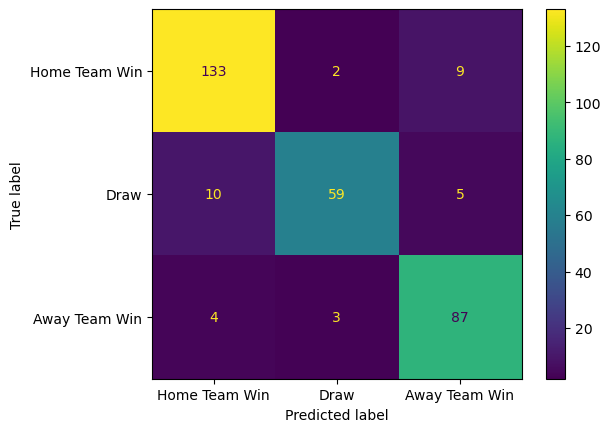

               precision    recall  f1-score   support

Home Team Win       0.86      0.93      0.89        94
         Draw       0.92      0.80      0.86        74
Away Team Win       0.90      0.92      0.91       144

     accuracy                           0.89       312
    macro avg       0.90      0.88      0.89       312
 weighted avg       0.90      0.89      0.89       312


Accuracy:  0.8942307692307693
Recall:  0.8942307692307693
Precision:  0.8957524401135168


----------------------------------------------------------
Predictions for BW


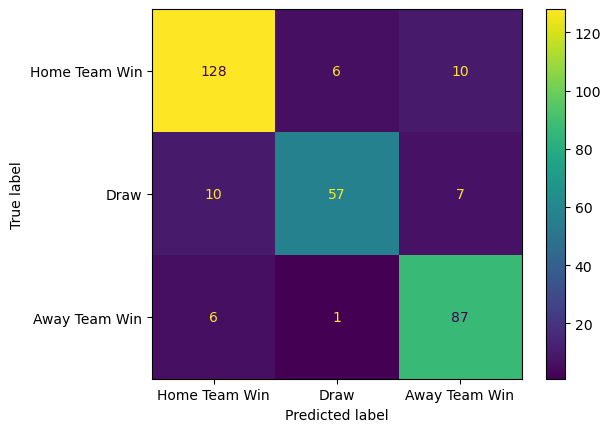

               precision    recall  f1-score   support

Home Team Win       0.84      0.93      0.88        94
         Draw       0.89      0.77      0.83        74
Away Team Win       0.89      0.89      0.89       144

     accuracy                           0.87       312
    macro avg       0.87      0.86      0.86       312
 weighted avg       0.87      0.87      0.87       312


Accuracy:  0.8717948717948718
Recall:  0.8717948717948718
Precision:  0.87352841469428


----------------------------------------------------------
Predictions for IW


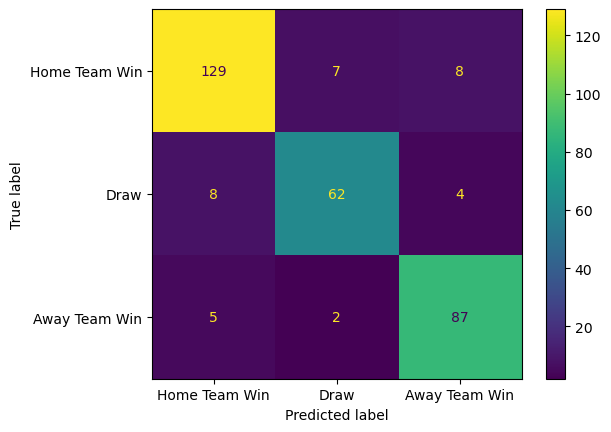

               precision    recall  f1-score   support

Home Team Win       0.88      0.93      0.90        94
         Draw       0.87      0.84      0.86        74
Away Team Win       0.91      0.90      0.90       144

     accuracy                           0.89       312
    macro avg       0.89      0.89      0.89       312
 weighted avg       0.89      0.89      0.89       312


Accuracy:  0.8910256410256411
Recall:  0.8910256410256411
Precision:  0.891162436937085


----------------------------------------------------------
Predictions for LB


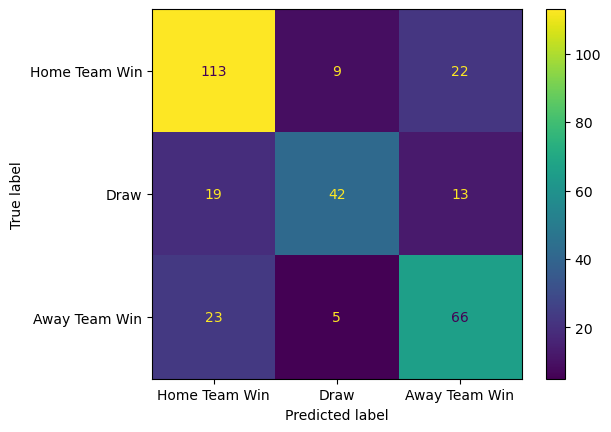

               precision    recall  f1-score   support

Home Team Win       0.65      0.70      0.68        94
         Draw       0.75      0.57      0.65        74
Away Team Win       0.73      0.78      0.76       144

     accuracy                           0.71       312
    macro avg       0.71      0.68      0.69       312
 weighted avg       0.71      0.71      0.71       312


Accuracy:  0.7083333333333334
Recall:  0.7083333333333334
Precision:  0.7112384222293198


----------------------------------------------------------


In [14]:
#Print results
for i in range(len(result_outcomes)):
    print("Predictions for " + clf_title[i])
    prediction_metrics(result_outcomes[i], result_y_predict_decoded[i])

In [64]:
import pandas as pd

# Load Table 1 and Table 2 into pandas dataframes
table1 = features_selected.copy()
table1[['Date','HomeTeam', 'AwayTeam']] = matches[['Date','HomeTeam', 'AwayTeam']]
table2 = pd.read_csv('https://www.football-data.co.uk/fixtures.csv')[['Date','HomeTeam', 'AwayTeam']]

# Sort Table 1 by date in descending order and drop duplicates based on HomeTeam and AwayTeam columns, keeping only the first (most recent) row for each team
table1 = table1.sort_values('Date', ascending=False).drop_duplicates(subset=['HomeTeam'], keep='first')

# Merge Table 1 and Table 2 based on the common columns 'HomeTeam' and 'AwayTeam'
merged_data = pd.merge(table2, table1, on=['HomeTeam'], how='left')

# Rename the columns in the merged data to match the column names in Table 2
merged_data = merged_data.rename(columns={'Date_x': 'Date'})

# Drop the unnecessary columns from the merged data
#merged_data = merged_data.drop([['Date_y']], axis=1)

merged_home = merged_data[['Date','HomeTeam','home_team_goals_difference', 'games_won_home_team']]

# Save the merged data to a new CSV file
merged_home = merged_home.dropna() #.to_csv('Merged_Data.csv', index=False)

# Sort Table 1 by date in descending order and drop duplicates based on HomeTeam and AwayTeam columns, keeping only the first (most recent) row for each team
table1 = table1.sort_values('Date', ascending=False).drop_duplicates(subset=['AwayTeam'], keep='first')

# Merge Table 1 and Table 2 based on the common columns 'HomeTeam' and 'AwayTeam'
merged_data = pd.merge(table2, table1, on=['AwayTeam'], how='left')

# Rename the columns in the merged data to match the column names in Table 2
merged_data = merged_data.rename(columns={'Date_x': 'Date'})

# Drop the unnecessary columns from the merged data
#merged_data = merged_data.drop([['Date_y']], axis=1)

merged_away = merged_data[['Date','AwayTeam','away_team_goals_difference', 'games_won_away_team']]

# Save the merged data to a new CSV file
merged_away = merged_away.dropna()#.to_csv('Merged_Data.csv', index=False)
fix = pd.concat([merged_home, merged_away], axis=1, join='inner').drop_duplicates()
columns_to_copy = ['home_team_goals_difference', 'away_team_goals_difference', 
                   'games_won_home_team', 'games_won_away_team']

fixtures = fix[columns_to_copy]
fixtures

,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team
0,0.083333,-0.200000,0.083333,0.050000
4,-0.173913,-0.333333,0.043478,0.000000
6,0.636364,0.476190,0.227273,0.238095
7,-0.090909,0.419355,0.090909,0.129032
8,-0.555556,-0.782609,0.000000,0.000000
9,-0.545455,0.500000,0.181818,0.333333


In [75]:
preds = clf.predict(fixtures)
preds

AttributeError: 'str' object has no attribute 'predict'

In [73]:
clf = clf_title[1]